*   NAMA : CHAMILLATUL LUQIANA AGUSTIN
*   NIM : 2241720020
*   ABSEN : 09
*   KELAS : TI 3E

# **Praktikum 1**
Klasifikasi SVM dengan Data Dummy

In [528]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

**Penjelasan:**

Kode tersebut mengimpor empat library yang umum digunakan dalam data science dan machine learning:
* **import numpy as np:** NumPy digunakan untuk komputasi numerik. NumPy menyediakan struktur data yang kuat seperti array dan matriks, dan fungsi matematika untuk beroperasi pada struktur data tersebut.
* **import matplotlib.pyplot as plt:** Matplotlib adalah library plotting yang digunakan untuk membuat visualisasi statis, interaktif, dan animasi dengan Python.
* **from scipy import stats:** SciPy adalah library yang digunakan untuk komputasi ilmiah dan teknis. SciPy menyediakan modul untuk optimasi, aljabar linier, integrasi, interpolasi, fungsi khusus, FFT, pemrosesan sinyal dan gambar, solver ODE, dan tugas-tugas lain yang umum dalam sains dan teknik.
* **import seaborn as sns:** Seaborn adalah library visualisasi data berbasis matplotlib. Seaborn menyediakan interface tingkat tinggi untuk menggambar grafik statistik yang menarik dan informatif.

Pada kegiatan ini, model yang digunakan adalah sebuah model yang sederhana berupa generative model untuk menentukan label pada poin baru. Kasus pada data dummy ini memperlihatkan dua kelas yang telah terpisah.

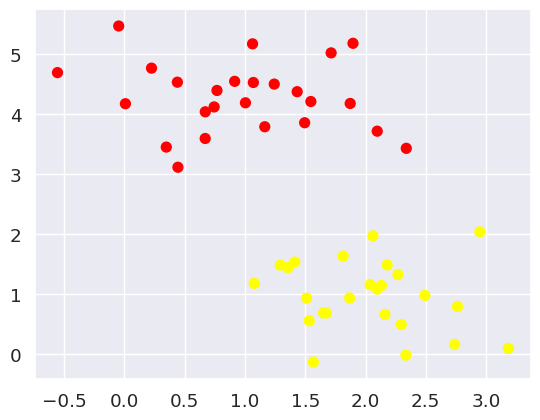

In [529]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

**Penjelasan:**

Kode tersebut menghasilkan dataset sintetis untuk clustering menggunakan fungsi make_blobs dari scikit-learn dan memvisualisasikannya menggunakan Matplotlib.
* **from sklearn.datasets import make_blobs:** Baris ini mengimpor fungsi make_blobs dari modul sklearn.datasets.
* **X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60):** Baris ini menghasilkan dataset sintetis dengan 50 sampel, 2 pusat (cluster), random state 0 untuk reprodusibilitas, dan standar deviasi cluster 0.6. Fungsi ini mengembalikan dua nilai: X, yang berisi titik data yang dihasilkan, dan y, yang berisi label cluster yang sesuai.
* **plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn'):** Baris ini membuat scatter plot dari data yang dihasilkan. X[:, 0] dan X[:, 1] masing-masing mewakili koordinat x dan y dari titik data. c=y menentukan bahwa warna titik harus ditentukan oleh label cluster. s=50 menetapkan ukuran titik, dan cmap='autumn' menentukan colormap yang akan digunakan.

Untuk membuat sebuah model klasifikasi, garis pemisah data dari dua buah himpunan yang terbentuk diperlukan. Namun, kondisi ini masih menyisakan kasus dimana garis pemisah yang dibutuhkan lebih dari satu garis.

(-1.0, 3.5)

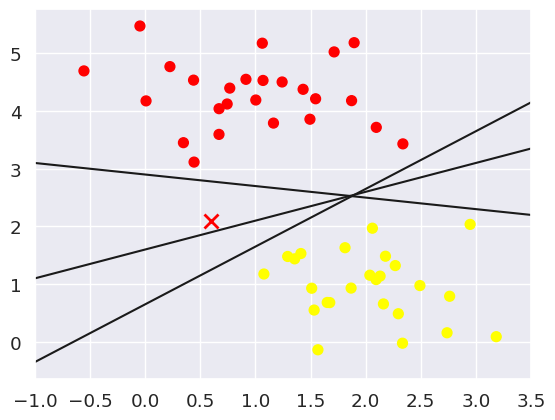

In [530]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

**Penjelasan:**

Kode tersebut memplot data yang dihasilkan oleh make_blobs (yang telah dibahas sebelumnya) dan menambahkan beberapa garis lurus ke plot tersebut, serta menandai sebuah titik dengan tanda silang (x).
* **xfit = np.linspace(-1, 3.5):** Membuat serangkaian titik yang terdistribusi secara merata dari -1 hingga 3.5. Titik-titik ini akan digunakan sebagai koordinat x untuk menggambar garis.
* **plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn'):** Membuat scatter plot dari data yang dihasilkan oleh make_blobs, seperti yang telah dijelaskan sebelumnya.
* **plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10):** Menambahkan tanda silang (x) berwarna merah di koordinat (0.6, 2.1) pada plot. markeredgewidth dan markersize mengontrol ketebalan dan ukuran tanda.
* **for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]::** Melakukan iterasi melalui tiga pasang nilai m dan b, yang merepresentasikan gradien dan titik potong y dari garis lurus.
* **plt.plot(xfit, m * xfit + b, '-k'):** Menggambar garis lurus dengan gradien m dan titik potong y b menggunakan titik-titik xfit yang telah dibuat sebelumnya. -k menentukan gaya garis (garis solid berwarna hitam).
* **plt.xlim(-1, 3.5):** Menetapkan batas sumbu x dari -1 hingga 3.5.

Kode tersebut kemungkinan digunakan untuk menunjukkan bagaimana garis yang berbeda dapat digunakan untuk memisahkan data dalam scatter plot, atau untuk mengilustrasikan konsep seperti margin dalam Support Vector Machine (SVM). Titik yang ditandai dengan tanda silang mungkin merepresentasikan titik data baru yang akan diklasifikasikan.

Banyaknya garis pemisah menunjukkan bahwa muncul beberapa kemungkinan suatu data baru masuk dalam kategori tertentu. Sebuah data baru 'x' dimunculkan pada posisi yang berbeda dengan data pada dua himpunan lain sehingga data baru ini tidak masuk ke dalam kategori dua himpunan sebelumnya.

Margin dalam suatu garis juga dapat digunakan untuk memperjelas posisi sebuah data terhadap label.

(-1.0, 3.5)

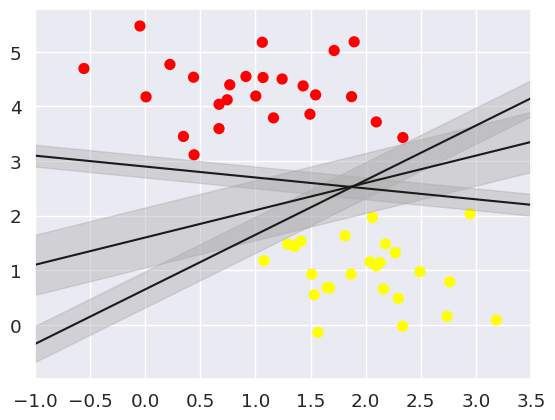

In [531]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

**Penjelasan:**

Kode tersebut memvisualisasikan scatter plot dengan margin di sekitar garis, kemungkinan untuk mengilustrasikan konsep margin dalam Support Vector Machines (SVM).
* **xfit = np.linspace(-1, 3.5):** Membuat array titik-titik yang berjarak sama di sepanjang sumbu-x, dari -1 hingga 3.5. Array ini digunakan untuk memplot garis.
* **plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn'):** Memplot titik data dari X, dengan warna yang ditentukan oleh y menggunakan colormap 'autumn'. Ini menciptakan scatter plot.
* **for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:** Perulangan ini mengiterasi tiga set parameter:
  * m: Kemiringan garis.
  * b: Titik potong-y dari garis.
  * d: Jarak margin dari garis.
* **yfit = m * xfit + b:** Menghitung koordinat-y untuk garis berdasarkan m dan b saat ini.
* **plt.plot(xfit, yfit, '-k'):** Memplot garis dengan koordinat-y yang dihitung dalam warna hitam.
* **plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4):** Mengisi area di sekitar garis untuk mewakili margin:
  * yfit - d dan yfit + d menentukan batas margin.
  * edgecolor='none' menghapus garis luar margin.
  * color='#AAAAAA' menetapkan warna margin menjadi abu-abu terang.
  * alpha=0.4 menambahkan transparansi ke margin.
* **plt.xlim(-1, 3.5):** Menetapkan batas sumbu-x agar sesuai dengan rentang xfit.

Kode tersebut bertujuan untuk mendemonstrasikan secara visual bagaimana garis yang berbeda dengan margin yang bervariasi dapat memisahkan titik data. Dalam konteks SVM, kode ini menunjukkan pentingnya menemukan batas keputusan (garis) yang memaksimalkan margin untuk meningkatkan akurasi klasifikasi dan generalisasi.

Margin yang digunakan pada SVM berfungsi untuk menunjukkan model yang paling optimal. Kriteria optimal ini diperoleh dari penentuan garis mana yang mampu memaksimalkan margin yang ada.

**Penerapan fitting SVM**

In [532]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

**Penjelasan:**

Kode tersebut mengimpor Support Vector Classifier (SVC) dari scikit-learn, menginisialisasi model SVC dengan kernel linier, dan melatih model pada data X dan y.
* **from sklearn.svm import SVC:** Mengimpor kelas SVC dari modul sklearn.svm. Kelas ini menyediakan fungsionalitas untuk membuat dan melatih model Support Vector Machine untuk klasifikasi.
* **model = SVC(kernel='linear', C=1E10):** Membuat instance dari kelas SVC dan menetapkannya ke variabel model.
  * **kernel='linear'** menentukan bahwa kernel linier harus digunakan untuk model. Ini berarti model akan mencoba menemukan hyperplane linier untuk memisahkan titik data ke dalam kelas yang berbeda.
  * **C=1E10** menetapkan nilai yang sangat tinggi untuk parameter penalti C. Parameter ini mengontrol trade-off antara memaksimalkan margin dan meminimalkan kesalahan klasifikasi. Nilai C yang tinggi memprioritaskan meminimalkan kesalahan klasifikasi, yang berpotensi menyebabkan margin yang lebih kecil tetapi akurasi yang lebih tinggi pada data pelatihan.
* **model.fit(X, y):** Melatih model SVC menggunakan data X (fitur) dan y (label). Proses ini melibatkan pencarian hyperplane optimal yang memisahkan titik data dengan margin terbesar yang mungkin sambil meminimalkan penalti untuk kesalahan klasifikasi.

Kode tersebut digunakan untuk membuat dan melatih model SVM linier untuk tugas klasifikasi. Model yang terlatih kemudian dapat digunakan untuk memprediksi label kelas untuk titik data baru yang tidak terlihat.

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [533]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

**Penjelasan:**

Kode tersebut adalah sebuah fungsi bernama plot_svc_decision_function yang digunakan untuk menampilkan fungsi keputusan (decision function) dari sebuah model Support Vector Classifier (SVC) pada sebuah plot. Fungsi ini biasanya digunakan untuk visualisasi hasil dari sebuah model SVC dalam sebuah dataset dua dimensi.

* **Parameter Fungsi:**
  * **model:** Merupakan model SVC yang telah dilatih.
  *  **ax:** Merupakan sumbu pada plot (axes) yang digunakan untuk plot data. Jika tidak diberikan, maka akan menggunakan sumbu saat ini (plt.gca()).
  * **plot_support:** Merupakan boolean yang menentukan apakah support vectors (vektor pendukung) dari model SVC akan ditampilkan atau tidak. Default-nya adalah True.

* **Mendapatkan Batas Plot:**
  ```python
  if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
  ```

  * Memastikan bahwa fungsi menggunakan sumbu plot yang ada atau membuat yang baru jika tidak ada yang diberikan. Kemudian mendapatkan batas x (xlim) dan batas y (ylim) dari sumbu plot.

* **Membuat Grid untuk Evaluasi Model:**
  ```python
  x = np.linspace(xlim[0], xlim[1], 30)
  y = np.linspace(ylim[0], ylim[1], 30)
  Y, X = np.meshgrid(y, x)
  xy = np.vstack([X.ravel(), Y.ravel()]).T
  P = model.decision_function(xy).reshape(X.shape)
  ```

  * Membuat grid dua dimensi (X, Y) untuk evaluasi model SVC. Grid ini dibuat dengan menggunakan np.linspace untuk menghasilkan nilai yang terdistribusi secara merata dalam rentang xlim dan ylim. Grid ini kemudian digabungkan dan dievaluasi menggunakan fungsi keputusan dari model (model.decision_function). Hasil evaluasi ini kemudian direshape kembali ke bentuk grid asli.

* **Memplot Batas dan Margin:**
  ```python
  ax.contour(X, Y, P, colors='k',
            levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
  ```

  * Memplot contour yang menunjukkan batas keputusan (decision boundary) dan margin dari model SVC. Batas keputusan (dimana decision function = 0) digambarkan dengan garis solid, sedangkan margin (dimana decision function = -1 dan 1) digambarkan dengan garis putus-putus.

* **Memplot Support Vectors:**
  ```python
  if plot_support:
    ax.scatter(model.support_vectors_[:, 0],
              model.support_vectors_[:, 1],
              s=300, linewidth=1, facecolors='none');
  ```

  * Jika plot_support adalah True, bagian ini memplot support vectors dari model SVC pada plot. Support vectors adalah titik-titik data yang terletak di margin atau batas margin yang membantu mendefinisikan hyperplane pemisah di SVM. Mereka digambarkan dengan lingkaran kosong besar.

* **Mengatur Batas Plot Kembali ke Awal:**
  ```python
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)
  ```

  * Mengatur batas x dan y pada plot kembali ke nilai awalnya.

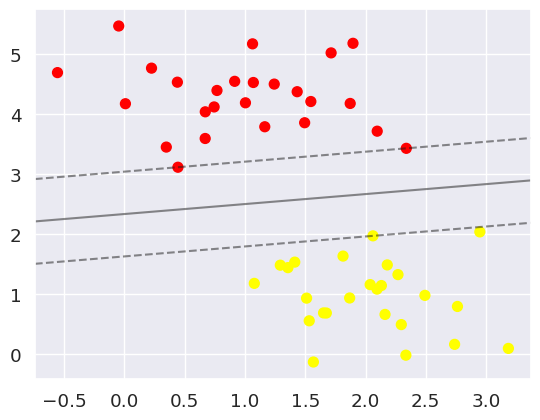

In [534]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

**Penjelasan:**

Kode tersebut digunakan untuk memvisualisasikan data points dan decision boundary dari sebuah model Support Vector Machine (SVM).
* **plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn'):**
  * Membuat scatter plot dari data points.
  * **X[:, 0] dan X[:, 1]** adalah koordinat x dan y dari data points.
  * **c=y** menunjukkan bahwa warna data points ditentukan oleh label y.
  * **s=50** menentukan ukuran data points.
  * **cmap='autumn'** menentukan skema warna yang digunakan.
* **plot_svc_decision_function(model):**
  * Memanggil fungsi yang telah didefinisikan sebelumnya (plot_svc_decision_function) untuk memplot decision boundary dan margin dari model SVM.
  * model adalah variabel yang menyimpan model SVM yang telah dilatih.

beberapa titik data yang menyentuh (masuk ke area) garis disebut sebagai support vector.

In [535]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

**Penjelasan:**

Kode tersebut digunakan untuk menampilkan data points yang menjadi support vectors dari model SVM.
* **model.support_vectors_:**
  * Mengakses atribut support_vectors_ dari objek model (model SVM). Atribut ini berisi data points yang berperan sebagai support vectors.
  * Support vectors adalah data points yang berada di margin atau di batas margin. Mereka adalah data points yang paling penting dalam menentukan decision boundary.

Hasil fitting merupakan kunci keberhasilan suatu classifier (yang hanya dilihat dari posisi dari support vector). Data-data lain yang berada jauh dari margin dan tetap berada di area yang tepat tidak memiliki kemampuan untuk memodifikasi fitting (karena bukan support vector). Data-data tersebut tidak berkontribusi terhadap loss function yang digunakan untuk fitting model. Untuk lebih memahami hal ini, 60 dan 120 data awal digunakan sebagai contoh dalam bentuk perbandingan.

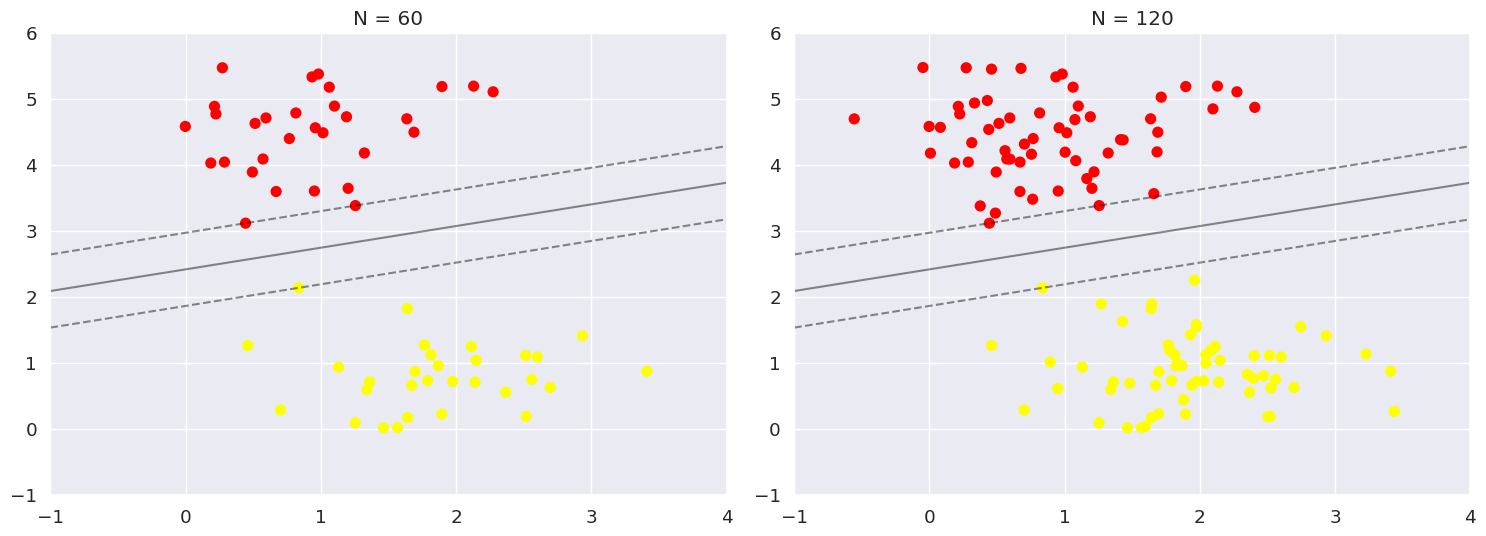

In [536]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

**Penjelasan:**

Kode tersebut adalah sebuah fungsi bernama plot_svm yang digunakan untuk memvisualisasikan hasil klasifikasi menggunakan Support Vector Machine (SVM) dengan kernel linear. Kode tersebut juga menampilkan pengaruh jumlah sampel data pada hasil klasifikasi.
* **Mendefinisikan Fungsi plot_svm:**
  ```phyton
  def plot_svm(N=10, ax=None):
  ```

  * Fungsi tersebut memiliki dua parameter:
    - **N:** Jumlah sampel data yang akan digunakan (default adalah 10).
    - **ax:** Objek sumbu (axes) untuk plot. Jika tidak diberikan, akan menggunakan sumbu plot saat ini.

* **Membuat Data Blobs:**
  ```phyton
  X, y = make_blobs(n_samples=200, centers=2,
                    random_state=0, cluster_std=0.60)
  X = X[:N]
  y = y[:N]
  ```

  * Membuat dataset sintetis menggunakan fungsi make_blobs dengan 200 sampel data dan 2 pusat (clusters). Kemudian, hanya N sampel pertama yang akan digunakan untuk pelatihan model.

* **Membuat dan Melatih Model SVM:**
  ```phyton
  model = SVC(kernel='linear', C=1E10)
  model.fit(X, y)
  ```

  * Membuat model SVM dengan kernel linear dan parameter C yang sangat besar (1E10) untuk memastikan margin yang ketat. Model ini kemudian dilatih menggunakan data X dan label y.

* **Mengatur Plot:**
  ```phyton
  ax = ax or plt.gca()
  ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
  ax.set_xlim(-1, 4)
  ax.set_ylim(-1, 6)
  plot_svc_decision_function(model, ax)
  ```

  * Menggunakan sumbu plot yang diberikan (ax) atau membuat sumbu plot baru jika tidak ada yang diberikan.
  * Memplot data X dengan warna berdasarkan label y menggunakan colormap autumn.
  * Mengatur batas plot untuk sumbu x dan y.
  * Memanggil fungsi plot_svc_decision_function untuk menampilkan fungsi keputusan dari model SVM pada plot.

* **Membuat Subplot untuk Visualisasi:**
  ```phyton
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
  fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
  for axi, N in zip(ax, [60, 120]):
      plot_svm(N, axi)
      axi.set_title('N = {0}'.format(N))
  ```

  * Membuat subplot dengan 1 baris dan 2 kolom, serta ukuran gambar (figsize) 16x6 inci.
  * Mengatur jarak antara subplot.
  * Untuk setiap subplot (axi), panggil fungsi plot_svm dengan jumlah sampel N yang berbeda (60 dan 120), kemudian atur judul subplot sesuai dengan nilai N.



**Data Tidak Terpisah Secara Linier**

Data yang terpisah secara tidak linier menjadi masalah pada model SVM. Oleh karena itu, kernel menjadi sebuah kebutuhan bagi SVM untuk melakukan fitting pada hubungan nonlinier dengan sebuah classifier linier.

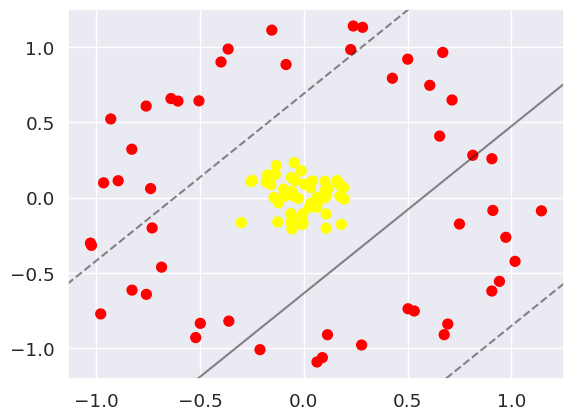

In [537]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

**Penjelasan:**

Kode tersebut digunakan untuk mendemonstrasikan kasus data yang tidak terpisah secara linier dan bagaimana model SVM dengan kernel linear gagal untuk memisahkan data tersebut.
* **from sklearn.datasets import make_circles:** Mengimpor fungsi make_circles dari library sklearn.datasets. Fungsi ini digunakan untuk membuat dataset sintetis berbentuk lingkaran.
* **X, y = make_circles(100, factor=.1, noise=.1):** Membuat dataset dengan 100 sampel, faktor skala 0.1, dan noise 0.1.
* **clf = SVC(kernel='linear').fit(X, y):**
  * Membuat objek SVC dengan kernel linear. Ini berarti model akan mencoba mencari hyperplane linear untuk memisahkan data.
  * Melatih model SVM dengan data X dan label y.
* **plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn'):** Membuat scatter plot dari data points, sama seperti penjelasan sebelumnya.
* **plot_svc_decision_function(clf, plot_support=False):** Memanggil fungsi plot_svc_decision_function untuk memplot decision boundary.
  * **plot_support=False** berarti support vectors tidak akan ditampilkan pada plot.

Jadi, kode tersebut menunjukkan bahwa model SVM dengan kernel linear tidak dapat memisahkan data yang tidak terpisah secara linier. Hal ini karena model tersebut hanya dapat membuat decision boundary berupa garis lurus.

Berdasarkan contoh data di atas, tidak ditemukan sebuah garis pemisah linier yang mampu berperan sebagai pemisah data. Oleh karena itu, proyeksi (sudut pandang) lain terhadap data diperlukan supaya data dapat terpisahkan dengan jelas. Pada kegiatan ini, proyeksi yang digunakan adalah proyeksi berbasis radial.

In [538]:
r = np.exp(-(X ** 2).sum(1))

**Penjelasan:**

Kode tersebut digunakan untuk menghitung nilai radial basis function (RBF) untuk setiap data point dalam dataset X.
* **X ** 2:** Mengkuadratkan setiap elemen dalam array X.
* **(X ** 2).sum(1):** Menjumlahkan nilai kuadrat dari setiap baris (data point) dalam array X.
* **np.exp(-(X ** 2).sum(1)):** Menghitung nilai eksponensial dari negatif hasil penjumlahan sebelumnya.

Nilai RBF ini kemudian dapat digunakan untuk memproyeksikan data ke dimensi yang lebih tinggi, sehingga data yang tidak terpisah secara linier di dimensi asli dapat dipisahkan secara linier di dimensi yang lebih tinggi.

Karena proyeksi radial tidak cukup menggunakan model 2D, maka plot visualisasi diubah menjadi model 3D.

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 0.75011901, -0.17474539],
       [ 0.65467785,  0.40910794],
       [-0.057541  ,  0.0427555 ],
       [ 0.71442765,  0.6489272 ],
       [-1.02709397, -0.30159997],
       [-0.36070203, -0.81966494],
       [-0.00325915, -0.16738253],
       [-0.92942061,  0.52297399],
       [ 0.60707998,  0.74618331],
       [ 0.16120831,  0.1141389 ],
       [-0.04622774,  0.23276477],
       [-0.13654471,  0.15507747],
       [-0.75798883, -0.64196848],
       [-0.21071282, -1.00916017],
       [-0.12796484, -0.01513249],
       [ 0.03318652,  0.06685519],
       [ 0.04253094,  0.11132908],
       [-0.97785525, -0.77178656],
       [-0.03913259,  0.11452543],
       [-0.15381254,  1.1126858 ],
       [ 0.90642345,  0.25889313],
       [ 0.23861621,  1.14017392],
       [ 0.06554781,  0.00365543],
       [ 0.10992575,  0.022471  ],
       [ 0.67656577, -0.90956859],
       [-0.1319927 ,  0.21362038],
       [-0.06157636, -0.10553801],
       [ 0.10363055,  0.05090822],
       [ 1.01791586, -0.42276873],
       [-0.02647912, -0.00429054],
       [ 0.00442859,  0.08898097],
       [ 0.06561963, -0.03936968],
       [ 0.42701351,  0.79341174],
       [ 0.19607192, -0.00988384],
       [-0.04764009,  0.01053163],
       [ 0.50098917,  0.91995736],
       [ 1.14483646, -0.08726485],
       [ 0.11830816,  0.0613795 ],
       [-0.00403144, -0.10704631],
       [-0.17389846,  0.15112397],
       [ 0.03410727, -0.0347239 ],
       [ 0.02672639, -0.06268178],
       [ 0.97342012, -0.26294639],
       [-0.18100885,  0.10378542],
       [-0.09222471,  0.00988947],
       [ 0.53233877, -0.75236446],
       [-0.1219225 , -0.03436145],
       [-0.05721509, -0.20701731],
       [ 0.11444093, -0.90993305],
       [ 0.10385047,  0.00175451],
       [ 0.17170869,  0.08812807],
       [-0.05993127,  0.13318904],
       [-0.36413811,  0.98717865],
       [ 0.06261397, -0.06459746],
       [ 0.10237775,  0.10916715],
       [-0.96387597,  0.09885338],
       [ 0.27866512, -0.9781088 ],
       [-0.63929701,  0.6581495 ],
       [-0.0851848 ,  0.88434233],
       [ 0.08969823, -1.06199693],
       [-0.01155966, -0.17468229],
       [ 0.1741031 ,  0.00993759],
       [-0.25400224,  0.10637817],
       [ 0.18089827, -0.17705995],
       [-0.7303147 , -0.20083477],
       [-0.01208351,  0.17891757],
       [ 0.69398438, -0.83905267],
       [ 0.19231588,  0.06822244],
       [-0.15779326,  0.08648218],
       [ 0.22646057,  0.9837763 ],
       [-0.68480967, -0.46118303],
       [ 0.91103224, -0.08455003],
       [-0.06151656, -0.164713  ],
       [-0.00563379, -0.17676307],
       [-0.12501418, -0.16089021],
       [-0.52027788, -0.92879593],
       [ 0.1080142 , -0.10748072],
       [-0.82805256,  0.32183296],
       [-0.4980404 , -0.83446962],
       [-0.50468116,  0.64324867],
       [-0.30059005, -0.16550874],
       [ 0.10750795, -0.20223605],
       [-0.60582553,  0.64146188],
       [-0.24781979,  0.11466638],
       [ 0.81429213,  0.28184491],
       [ 0.50266155, -0.73756423],
       [-0.09664606,  0.05717584],
       [-0.75888415,  0.60837411],
       [-0.89376726,  0.11270469],
       [ 0.28341154,  1.13145431],
       [ 0.94280879, -0.55548641],
       [-0.14356827,  0.00191784],
       [-0.05570366, -0.1288839 ],
       [-0.39834479,  0.90113887],
       [ 0.0639187 , -1.09110693],
       [ 0.66979241,  0.96476097],
       [-1.02250627, -0.31642703],
       [ 0.90594387, -0.61971238],
       [-0.73751224,  0.06059668],
       [-0.82722839, -0.6137553 ]]), y=array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]))>

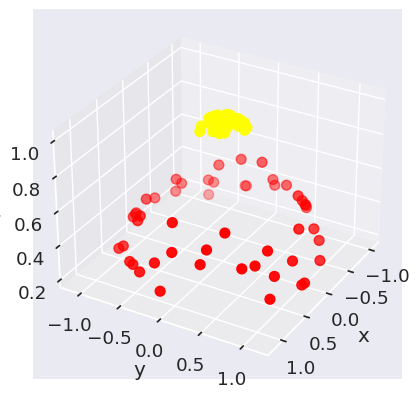

In [539]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

**Penjelasan:**

Kode tersebut digunakan untuk membuat visualisasi data dalam bentuk 3 dimensi (3D) dan memungkinkan interaksi untuk mengubah sudut pandang plot.
* **from mpl_toolkits import mplot3d:** Mengimpor modul mplot3d untuk membuat plot 3D.
* **from ipywidgets import interact, fixed:** Mengimpor fungsi interact dan fixed dari library ipywidgets untuk membuat widget interaktif.
* **def plot_3D(elev=30, azim=30, X=X, y=y):**
  * Mendefinisikan fungsi plot_3D dengan parameter elev (sudut elevasi), azim (sudut azimuth), X (data points), dan y (label).
  * **ax = plt.subplot(projection='3d'):** Membuat subplot 3D.
  * **ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn'):** Membuat scatter plot 3D.
    - X[:, 0], X[:, 1], dan r adalah koordinat x, y, dan z dari data points.
    - Parameter lainnya sama seperti penjelasan sebelumnya.
  * **ax.view_init(elev=elev, azim=azim):** Mengatur sudut pandang plot.
  * **ax.set_xlabel('x'), ax.set_ylabel('y'), ax.set_zlabel('r'):** Memberi label pada sumbu x, y, dan z.
* **interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180), X=fixed(X), y=fixed(y)):**
  * Membuat widget interaktif untuk mengubah sudut pandang plot.
  * **elev=[-90, 45, 30, 20 , 10]:** Menentukan pilihan sudut elevasi.
  * **azip=(-180, 180):** Menentukan rentang sudut azimuth.
  * **X=fixed(X), y=fixed(y):** Menentukan bahwa nilai X dan y tetap (tidak berubah).

walaupun data dapat ditampilkan secara terpisah. Proyeksi titik data sejumlah N ke dalan suatu dimensi N menyebabkan beban komputasi juga bertambah. Untuk mengatasi hal ini, kernel radial basis function (RBF) pada Scikit-Learn digunakan.

In [540]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

**Penjelasan:**

Kode tersebut digunakan untuk membuat dan melatih model SVM dengan kernel Radial Basis Function (RBF).
* **clf = SVC(kernel='rbf', C=1E6):**
  * Membuat objek Support Vector Classifier (SVC) dengan kernel rbf dan parameter C sebesar 1E6 (1000000).
  * Kernel RBF digunakan untuk memetakan data ke dimensi yang lebih tinggi sehingga data yang tidak terpisah secara linier dapat dipisahkan.
  * Parameter C adalah parameter regularisasi yang mengontrol trade-off antara memaksimalkan margin dan meminimalkan kesalahan klasifikasi. Nilai C yang besar akan menghasilkan margin yang lebih kecil dan lebih sedikit kesalahan klasifikasi pada data training.
* **clf.fit(X, y):**
  * Melatih model SVM (clf) menggunakan data X (fitur) dan y (label).

Jadi, kode tersebut digunakan ketika data tidak terpisah secara linier. Kernel RBF memungkinkan model SVM untuk membuat decision boundary non-linear yang dapat memisahkan data dengan lebih baik.

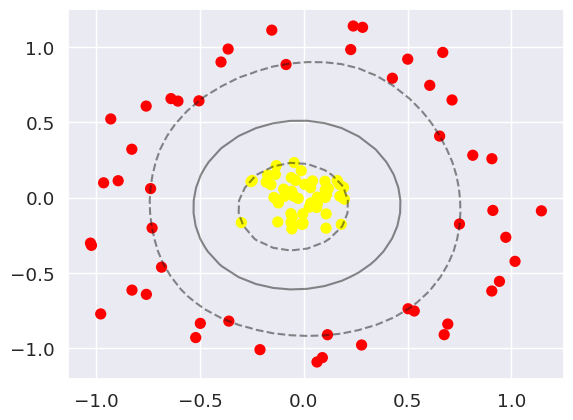

In [541]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

**Penjelasan:**

Kode tersebut digunakan untuk memvisualisasikan data points, decision boundary, dan support vectors dari model SVM dengan kernel RBF.
* **plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn'):** Membuat scatter plot dari data points. Sama seperti penjelasan sebelumnya.
* **plot_svc_decision_function(clf):** Memanggil fungsi plot_svc_decision_function untuk memplot decision boundary dan margin dari model SVM (clf).
* **plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1, facecolors='none'):**
  * Menampilkan support vectors pada plot.
  * clf.support_vectors_[:, 0] dan clf.support_vectors_[:, 1] adalah koordinat x dan y dari support vectors.
  * **s=300:** Menentukan ukuran support vectors (lebih besar dari data points biasa).
  * **lw=1:** Menentukan lebar garis tepi support vectors.
  * **facecolors='none':** Membuat support vectors berupa lingkaran kosong.

Jadi,kode tersebut berguna untuk memvisualisasikan hasil dari model SVM dengan kernel RBF. Kita dapat melihat bagaimana decision boundary non-linear memisahkan data dan data points mana yang menjadi support vectors.

**Data Overlap**

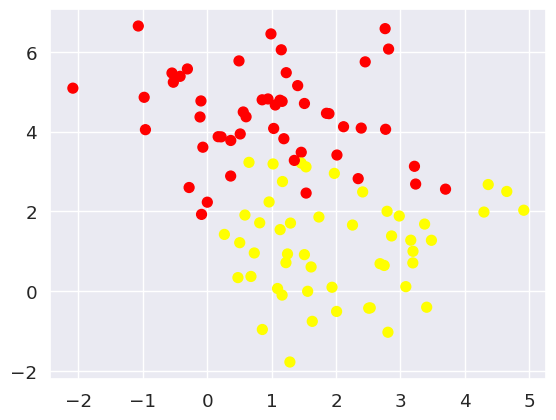

In [542]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

**Penjelasan:**

Kode tersebut digunakan untuk membuat dataset sintetis dengan dua cluster data yang saling tumpang tindih (overlap) dan memvisualisasikannya dalam scatter plot.
* **X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2):**
  * Membuat dataset sintetis menggunakan fungsi make_blobs.
  * **n_samples=100:** Membuat 100 data points.
  * **centers=2:** Membuat dua cluster data.
  * **random_state=0:** Menentukan seed untuk generator angka acak agar hasilnya tetap sama setiap kali dijalankan.
  * **cluster_std=1.2:** Menentukan standar deviasi dari cluster. Nilai 1.2 menunjukkan bahwa data points dalam cluster akan tersebar lebih luas, sehingga cluster akan saling tumpang tindih.
* **plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn'):** Membuat scatter plot dari data points. Sama seperti penjelasan sebelumnya.

Jadi, kode tersebut digunakan untuk membuat dataset yang lebih realistis di mana cluster data tidak terpisah secara sempurna

untuk mengatasi hal ini, teknik penghalusan margin pada SVM dapat diterapkan. Teknik ini berfungsi untuk memasukkan beberapa titik data ke dalam margin supaya menghasilkan fitting yang lebih baik. Penebalan margin dari hasil teknik penghalusan dikelola oleh sebuah parameter tuning (dikenal sebagai C). Contoh dibawah menunjukkan perubahan pada C berdampak pada hasil fitting final.

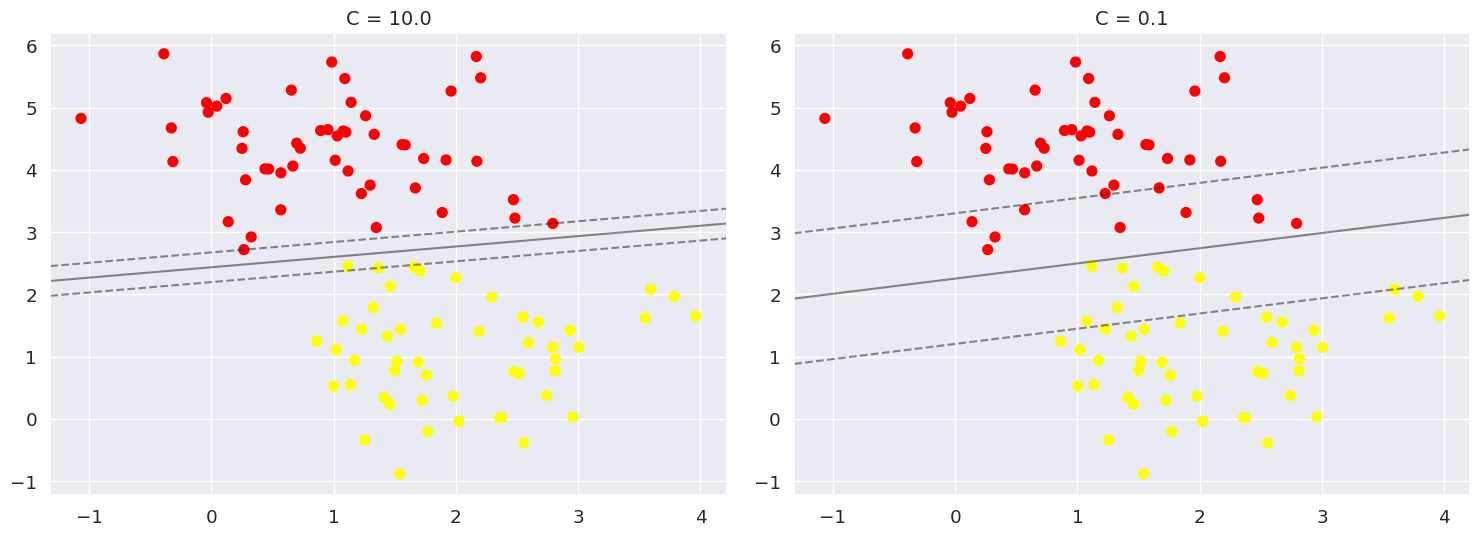

In [543]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

**Penjelasan:**

Kode tersebut digunakan untuk memvisualisasikan hasil klasifikasi menggunakan Support Vector Machine (SVM) dengan kernel linear. Kode tersebut menunjukkan bagaimana parameter regularisasi C mempengaruhi batas keputusan dan support vectors dalam model SVM.
* **Membuat data Blobs:**
  ```phyton
  X, y = make_blobs(n_samples=100, centers=2,
                    random_state=0, cluster_std=0.8)
  ```

  * Membuat dataset sintetis menggunakan fungsi make_blobs dengan 100 sampel data dan 2 pusat (clusters). Parameter cluster_std=0.8 menentukan standar deviasi dari setiap cluster, sedangkan random_state=0 memastikan bahwa hasilnya dapat direproduksi.

* **Membuat Subplot untuk Visualisasi:**
  ```phyton
  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
  fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
  ```

  * Membuat subplot dengan 1 baris dan 2 kolom, serta ukuran gambar (figsize) 16x6 inci.
  * Mengatur jarak antara subplot dengan wspace=0.1 untuk memberikan sedikit ruang antara kedua plot.

* **Melatih Model SVM dengan Parameter C yang Berbeda:**
  ```phyton
  for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)
    ```

    * Untuk setiap subplot (axi), latih model SVM dengan kernel linear dan nilai parameter C yang berbeda (10.0 dan 0.1).
    * Memplot data X dengan warna berdasarkan label y menggunakan colormap autumn.
    * Memanggil fungsi plot_svc_decision_function untuk menampilkan fungsi keputusan dari model SVM pada plot.
    * Memplot support vectors dari model SVM dengan lingkaran kosong besar.
    * Mengatur judul subplot sesuai dengan nilai parameter C yang digunakan.

Perlu diperhatikan bahwa nila optimal sebuah C bergantung pada setiap dataset (melalui cross-validation atau prosedur serupa)

# **Praktikum 2**
Klasifikasi SVM Pada Data Citra

dataset yang digunakan adalah Labeled Faces in the Wild dataset (sebuah dataset yang berisi ribuan wajah publik figur).

Link dataset: https://www.kaggle.com/datasets/jessicali9530/lfw-dataset

In [544]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


**Penjelasan:**

Kode tersebut digunakan untuk mengunduh dan menampilkan informasi dasar dari dataset Labeled Faces in the Wild (LFW) people. Dataset ini berisi gambar wajah orang-orang terkenal.
* **from sklearn.datasets import fetch_lfw_people:** Mengimpor fungsi fetch_lfw_people dari library sklearn.datasets. Fungsi ini digunakan untuk mengunduh dataset LFW.
* **faces = fetch_lfw_people(min_faces_per_person=60):**
  * Mengunduh dataset LFW dan menyimpannya dalam variabel faces.
  * **min_faces_per_person=60:** Hanya menyertakan orang yang memiliki minimal 60 gambar wajah di dataset.
* **print(faces.target_names):** Menampilkan nama-nama orang yang ada di dataset.
* **print(len(faces.target_names)):** Menampilkan jumlah orang yang ada di dataset.
* **print(faces.images.shape):** Menampilkan dimensi dari gambar-gambar di dataset (jumlah gambar, tinggi, lebar).

Jadi, kode tersebut berguna untuk mengenal dataset LFW people. Informasi yang ditampilkan (nama orang, jumlah orang, dimensi gambar) memberikan gambaran awal tentang isi dan karakteristik dataset.

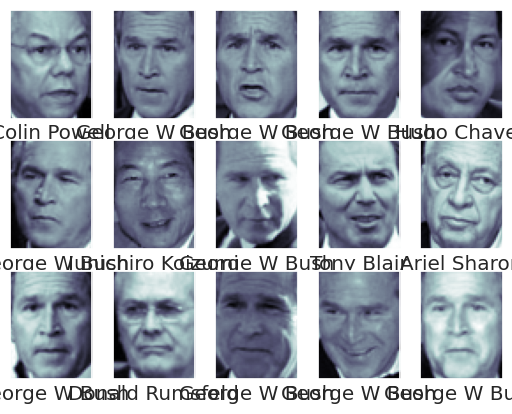

In [545]:
# contoh wajah yang digunakan

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

**Penjelasan:**

Kode tersebut digunakan untuk menampilkan beberapa contoh gambar wajah dari dataset faces yang telah diunduh sebelumnya.
* **fig, ax = plt.subplots(3, 5):** Membuat figure dan axes untuk menampilkan gambar. 3, 5 menunjukkan bahwa akan ada 3 baris dan 5 kolom gambar, sehingga total ada 15 gambar yang akan ditampilkan.
* **for i, axi in enumerate(ax.flat)::** Melakukan iterasi untuk setiap axes yang telah dibuat. ax.flat digunakan untuk mengakses semua axes dalam bentuk array 1 dimensi.
  * **axi.imshow(faces.images[i], cmap='bone'):** Menampilkan gambar pada axes axi. faces.images[i] adalah gambar ke-i dalam dataset. cmap='bone' menentukan colormap yang digunakan (grayscale).
  * **axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]]):**
    - **xticks=[], yticks=[]:** Menghilangkan tanda centang pada sumbu x dan y.
    - **xlabel=faces.target_names[faces.target[i]]:** Memberi label pada sumbu x dengan nama orang yang ada di gambar.

In [546]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

**Penjelasan:**

Kode tersebut digunakan untuk membuat pipeline yang menggabungkan Principal Component Analysis (PCA) dan Support Vector Machine (SVM) untuk klasifikasi wajah.
* **from sklearn.svm import SVC:** Mengimpor class SVC untuk membuat model SVM.
* **from sklearn.decomposition import PCA as RandomizedPCA:** Mengimpor class PCA (diberi alias RandomizedPCA) untuk melakukan dimensionality reduction.
* **from sklearn.pipeline import make_pipeline:** Mengimpor fungsi make_pipeline untuk membuat pipeline.
* **pca = RandomizedPCA(n_components=150, whiten=True, random_state=42):**
  * Membuat objek RandomizedPCA dengan 150 komponen utama (n_components=150), whitening (whiten=True), dan random state 42 (random_state=42).
  * PCA digunakan untuk mengurangi dimensi data dengan memproyeksikannya ke ruang dimensi yang lebih rendah.
  * Whitening digunakan untuk menstandarisasi fitur-fitur data.
* **svc = SVC(kernel='rbf', class_weight='balanced'):**
  * Membuat objek SVC dengan kernel RBF (kernel='rbf') dan class weight balanced (class_weight='balanced').
  * Class weight balanced digunakan untuk menangani data yang tidak seimbang (jumlah data per kelas berbeda signifikan).
* **model = make_pipeline(pca, svc):**
  * Membuat pipeline dengan menggabungkan objek pca dan svc.
  * Pipeline ini akan melakukan PCA terlebih dahulu untuk mengurangi dimensi data, kemudian melakukan klasifikasi menggunakan SVM.

Jadi, kode tersebut berguna untuk membuat model klasifikasi yang lebih efisien. PCA digunakan untuk mengurangi dimensi data dan menghilangkan fitur-fitur yang tidak penting, sehingga dapat mempercepat proses training SVM dan meningkatkan performa model.

In [547]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

**Penjelasan:**

Kode tersebut digunakan untuk memisahkan dataset faces menjadi data training dan data testing.
* **from sklearn.model_selection import train_test_split:** Mengimpor fungsi train_test_split dari library sklearn.model_selection. Fungsi ini digunakan untuk memisahkan data menjadi data training dan data testing.
* **Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42):**
  * Memisahkan data fitur (faces.data) dan label (faces.target) menjadi data training (Xtrain, ytrain) dan data testing (Xtest, ytest).
  * **random_state=42:** Menentukan seed untuk generator angka acak agar hasil pemisahan data tetap sama setiap kali dijalankan.

Jadi, kode tersebut berguna untuk mempersiapkan data sebelum melakukan training model. Data training digunakan untuk melatih model, sedangkan data testing digunakan untuk menguji performa model pada data yang belum pernah dilihat sebelumnya.

In [548]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 1min 35s, sys: 23.4 s, total: 1min 58s
Wall time: 1min 29s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


**Penjelasan:**

Kode tersebut digunakan untuk mencari parameter terbaik untuk model SVM menggunakan teknik Grid Search dan mengukur waktu yang dibutuhkan untuk proses tersebut.
* **from sklearn.model_selection import GridSearchCV:** Mengimpor class GridSearchCV dari library sklearn.model_selection. Class ini digunakan untuk melakukan Grid Search.
* **param_grid = {'svc__C': [1, 5, 10, 50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}:**
  * Mendefinisikan grid parameter yang akan dicoba.
  * **svc__C:** Menentukan nilai-nilai untuk parameter C dari model SVM.
  * **svc__gamma:** Menentukan nilai-nilai untuk parameter gamma dari model SVM.
* **grid = GridSearchCV(model, param_grid):** Membuat objek GridSearchCV dengan model model dan grid parameter param_grid.
* **%time grid.fit(Xtrain, ytrain):**
  * Melatih model dengan semua kombinasi parameter di param_grid dan mengukur waktu yang dibutuhkan.
  * **%time** adalah magic command di Jupyter Notebook/ Google Colab untuk mengukur waktu eksekusi kode.
* **print(grid.best_params_):** Menampilkan parameter terbaik yang ditemukan.
* **print(grid.best_score_):** Menampilkan skor terbaik yang dicapai dengan parameter terbaik.

Jadi, kode tersebut berguna untuk mengoptimalkan model SVM. Grid Search akan mencoba semua kombinasi parameter yang ditentukan dan mencari kombinasi yang menghasilkan skor terbaik. Parameter terbaik kemudian dapat digunakan untuk meningkatkan performa model.

Prediksi label untuk data testing

In [549]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

**Penjelasan:**

Kode tersebut digunakan untuk menggunakan model terbaik hasil dari GridSearchCV untuk memprediksi label pada data testing.
* **model = grid.best_estimator_:** Mengambil model dengan parameter terbaik yang telah ditemukan oleh GridSearchCV dan menyimpannya dalam variabel model.
* **yfit = model.predict(Xtest):** Melakukan prediksi label pada data testing (Xtest) menggunakan model terbaik (model) dan menyimpan hasilnya dalam variabel yfit.

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

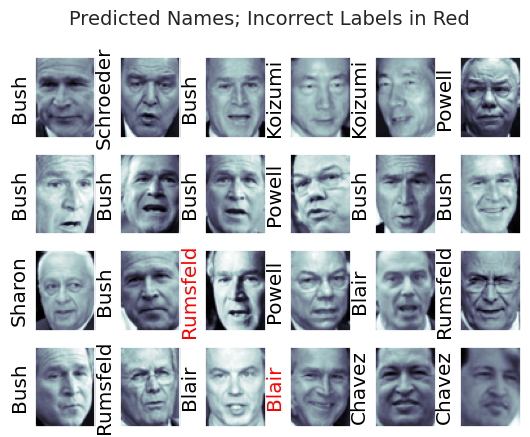

In [550]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

**Penjelasan:**

Kode tersebut digunakan untuk menampilkan gambar-gambar dari data testing beserta label prediksi dan label sebenarnya. Label prediksi yang salah akan ditampilkan dengan warna merah.
* **fig, ax = plt.subplots(4, 6):** Membuat figure dan axes untuk menampilkan gambar. Akan ada 4 baris dan 6 kolom gambar, total 24 gambar.
* **for i, axi in enumerate(ax.flat)::** Melakukan iterasi untuk setiap axes.
  * **axi.imshow(Xtest[i].reshape(62, 47), cmap='bone'):** Menampilkan gambar pada axes axi. Xtest[i] adalah data gambar ke-i dari data testing. Gambar di-reshape menjadi ukuran 62x47.
  * **axi.set(xticks=[], yticks=[]):** Menghilangkan tanda centang pada sumbu x dan y.
  * **axi.set_ylabel(faces.target_names[yfit[i]].split()[-1], color='black' if yfit[i] == ytest[i] else 'red'):**
    - Memberi label pada sumbu y dengan nama orang yang diprediksi.
    - **faces.target_names[yfit[i]].split()[-1]:** Mengambil nama belakang dari orang yang diprediksi.
    - **color='black' if yfit[i] == ytest[i] else 'red':**
      - Jika prediksi benar (label prediksi sama dengan label sebenarnya), warna label hitam.
      - Jika prediksi salah, warna label merah.
* **fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14):** Memberi judul pada figure.

Jdi, kode tersbut berguna untuk memvisualisasikan hasil prediksi model pada data testing dan melihat langsung gambar-gambar mana yang diprediksi dengan benar dan yang salah.

contoh di atas hanya menunjukkan satu data dengan label salah. Secara pengukuran, performa klasifikasi dapat diketahui sebagai berikut

In [551]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



**Penjelasan:**

Kode tersebut digunakan untuk menampilkan laporan klasifikasi yang berisi informasi detail tentang performa model pada data testing.
* **from sklearn.metrics import classification_report:** Mengimpor fungsi classification_report dari library sklearn.metrics. Fungsi ini digunakan untuk membuat laporan klasifikasi.
* **print(classification_report(ytest, yfit, target_names=faces.target_names)):**
  * Menampilkan laporan klasifikasi.
  * **ytest:** Label sebenarnya dari data testing.
  * **yfit:** Label prediksi dari model.
  * **target_names=faces.target_names:** Memberi label pada setiap kelas dengan nama-nama orang yang ada di dataset.

Laporan klasifikasi yang dihasilkan akan berisi informasi seperti:
* **Precision:** Proporsi prediksi positif yang benar dari semua prediksi positif.
* **Recall:** Proporsi prediksi positif yang benar dari semua data yang sebenarnya positif.
* **F1-score:** Rata-rata harmonik dari precision dan recall.
* **Support:** Jumlah data untuk setiap kelas.

Text(106.44999999999996, 0.5, 'predicted label')

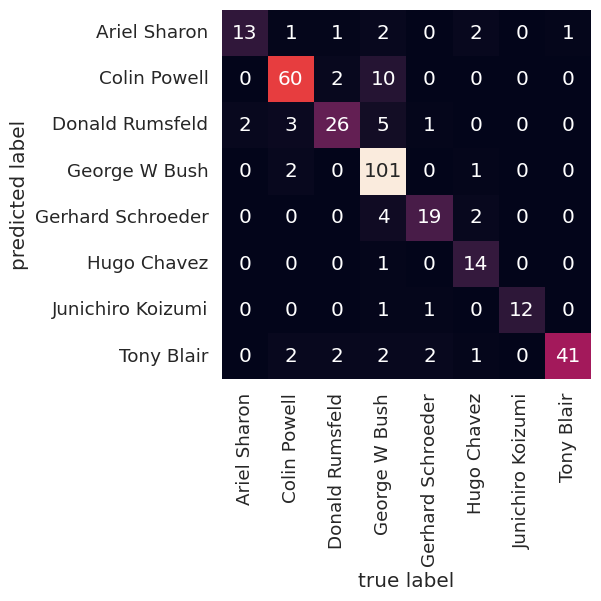

In [552]:
# bentuk confusion matrix

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

**Penjelasan:**

Kode tersebut digunakan untuk membuat dan menampilkan confusion matrix yang memberikan visualisasi performa model klasifikasi.
* **from sklearn.metrics import confusion_matrix:** Mengimpor fungsi confusion_matrix dari library sklearn.metrics. Fungsi ini digunakan untuk membuat confusion matrix.
* **mat = confusion_matrix(ytest, yfit):** Membuat confusion matrix dari label sebenarnya (ytest) dan label prediksi (yfit).
* **sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=faces.target_names, yticklabels=faces.target_names):**
  * Membuat heatmap dari confusion matrix menggunakan library Seaborn (sns).
  * **mat.T:** Melakukan transpose pada matrix.
  * **square=True:** Membuat bentuk heatmap menjadi persegi.
  * **annot=True:** Menampilkan angka di dalam setiap sel heatmap.
  * **fmt='d':** Format angka sebagai integer.
  * **cbar=False:** Menghilangkan color bar.
  * **xticklabels=faces.target_names:** Memberi label pada sumbu x dengan nama-nama orang di dataset.
  * **yticklabels=faces.target_names:** Memberi label pada sumbu y dengan nama-nama orang di dataset.
* **plt.xlabel('true label'):** Memberi label pada sumbu x.
* **plt.ylabel('predicted label'):** Memberi label pada sumbu y.

Confusion matrix memberikan informasi tentang jumlah prediksi yang benar dan salah untuk setiap kelas:
* Sumbu x menunjukkan label sebenarnya.
* Sumbu y menunjukkan label prediksi.
* Angka di dalam setiap sel menunjukkan jumlah data.

# **Praktikum 3**
Klasifikasi Naive Bayes dengan Data Dummy

Pada percobaan ini kita akan menggunakan data dummy (sintentis) untuk membuat sebuah model Naive Bayes. Untuk membuat data dummy, kita dapat menggunakan fungsi make_classification dari library scikit-learn. Selanjutnya, kita akan membuat model Multinomial Naive Bayes dengan menggunakan MultinomialNB dan model Gaussian Naive Bayes menggunakan GaussianNB.

**Mendefiniskan Data Dummy**

In [553]:
import numpy as np
from sklearn.datasets import make_classification

# Membuat data dummy
# Hasil dari make_classification berupa data fitur X dan label y
# Label y akan berupa data yang sudah di encode (angka)
X,y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

# Secara defalt, make_classfication menghasilkan nilai float
# Kita perlu merubah dalam bentuk diskrit

# Absolutekan nilai
X = np.absolute(X)

# Bulatkan nilai ke 2 angka dibelakang koma
# Kalikan dengan 100 supaya tidak ada lagi koma
X = np.round(X, 2) * 100

# Ubah ke dalam bentuk integer
X = X.astype(int)
print(X)
print(y)

[[210  14]
 [165  38]
 [ 77 134]
 [ 25 179]
 [ 63 135]
 [ 65 138]
 [ 17 223]
 [ 74 139]
 [134   3]
 [133 192]
 [ 64  71]
 [ 83 118]
 [112  65]
 [141   7]
 [ 77  18]
 [ 82  93]
 [ 81 156]
 [ 14 103]
 [ 18   6]
 [125 173]
 [  3 123]
 [ 45   8]
 [ 55  35]
 [181  77]
 [ 43 120]
 [142  86]
 [122  96]
 [ 70 113]
 [164  62]
 [ 64 110]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1]


**Penjelasan:**

Kode tersebut digunakan untuk membuat dataset dummy yang berisi fitur-fitur (X) dan label (y) untuk tujuan klasifikasi. Dataset ini dihasilkan dengan menggunakan fungsi make_classification dari scikit-learn.
* **Import Modul:**
  ```phyton
  import numpy as np
  from sklearn.datasets import make_classification
  ```

  * Mengimpor modul numpy dan make_classification dari scikit-learn yang akan digunakan untuk membuat dan memanipulasi dataset.
* **X,y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False):**
  * Bagian ini membuat dataset dummy menggunakan make_classification dengan parameter:
    * **n_samples=30:** Membuat 30 sampel data.
    * **n_features=2:** Setiap sampel memiliki 2 fitur.
    * **n_classes=2:** Dataset memiliki 2 kelas.
    * **n_informative=2:** Kedua fitur adalah fitur yang informatif.
    * **n_redundant=0:** Tidak ada fitur yang redundan.
    * **n_repeated=0:** Tidak ada fitur yang diulang.
    * **shuffle=False:** Data tidak diacak.
  * Fungsi ini menghasilkan dua output:
    * X: Array 2D yang berisi fitur-fitur dari sampel data.
    * y: Array 1D yang berisi label dari masing-masing sampel data.
* **X = np.absolute(X):** Mengubah semua nilai negatif dalam array X menjadi positif menggunakan fungsi np.absolute.
* **X = np.round(X, 2) * 100:** Membulatkan setiap nilai dalam array X ke dua angka di belakang koma menggunakan fungsi np.round. Setelah itu, nilai-nilai tersebut dikalikan dengan 100 untuk menghilangkan koma, sehingga nilai-nilai menjadi bilangan bulat besar.
* **X = X.astype(int):** Mengubah tipe data dari array X menjadi integer menggunakan metode astype.
* **print(X), print(y):** mencetak array X yang telah dimanipulasi dan array y yang berisi label.


Parameter yang digunakan pada fungsi make_classification adalah,
*   n_samples: jumlah sampel yang diinginkan
*   n_features: jumlah fitur yang digunakan
*   n_classes: jumlah kelas
*   n_informative: jumlah fitur yang memiliki korelasi dengan kelas
*   n_redundant: jumlah fitur yang tidak memiliki korelasi dengan kelas
*   n_repeated: jumlah fitur yang diulang

**(Opsional) Membuat Data Frame**

Agar data lebih mudah untuk dibaca, maka kita akan membuat DataFrame dengan menggunakan library Pandas berdasarkan data dummy yang telah dibuat sebelumnya

In [554]:
import pandas as pd

# Reshape label y menjadi 2D
# Hal ini dilakukan karena kita akan menggabungkannya dengan data fitur X
y_new = y.reshape(len(y), 1)

# Gabungkan fitur X dan label y dalam data array
data = np.concatenate((X, y_new), axis=1)

# Definisikan nama kolom
nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']

# Buat Data Frame
df = pd.DataFrame(data, columns=nama_kolom)

# Cek Data Frame
df.head()

Fitur 1  Fitur 2  Label
0      210       14      0
1      165       38      0
2       77      134      0
3       25      179      0
4       63      135      0

**Penjelasan:**

Kode tersebut digunakan untuk membuat Pandas DataFrame dari data fitur X dan label y.
* **import pandas as pd:** Mengimpor library Pandas dan memberinya alias pd.
* **y_new = y.reshape(len(y), 1):** Mengubah bentuk array y (label) menjadi 2 dimensi. Hal ini dilakukan agar y dapat digabungkan dengan X yang juga 2 dimensi.
* **data = np.concatenate((X, y_new), axis=1):** Menggabungkan array X (fitur) dan y_new (label) secara horizontal (axis=1).
* **nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']:** Mendefinisikan nama kolom untuk DataFrame.
* **df = pd.DataFrame(data, columns=nama_kolom):** Membuat Pandas DataFrame dari array data dan memberikan nama kolom sesuai dengan nama_kolom.
* **df.head():** Menampilkan 5 baris pertama dari DataFrame.

Jadi, kode tersebut berguna untuk mengorganisasi data fitur dan label dalam bentuk tabel (DataFrame) sehingga lebih mudah dibaca dan diolah.

Dikarenakan label masih berbetuk encoding angka, untuk mempermudah pembacaan data, kita dapat mengubah bentuknya dalam bentuk kategorial

In [555]:
# Definisikan nama label
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

# Copy Data Frame untuk menyimpan Data Frame baru
# dengan label yang mudah untuk dibaca
df_label = df.copy()

# Ubah label dengan fungsi mapping dari Pandas
# pada Data Frame df_label
df_label['Label'] = df_label['Label'].map(labels)

# Cek Data Frame df_label
df_label.head()

Fitur 1  Fitur 2    Label
0      210       14  Kelas B
1      165       38  Kelas B
2       77      134  Kelas B
3       25      179  Kelas B
4       63      135  Kelas B

**Penjelasan:**

Kode tersebut digunakan untuk mengubah label numerik (0 dan 1) pada DataFrame df menjadi label kategorikal ('Kelas A' dan 'Kelas B') dan menyimpannya dalam DataFrame baru df_label.
* **labels = {1 : 'Kelas A', 0 : 'Kelas B'}:** Membuat dictionary labels yang memetakan nilai numerik 1 ke 'Kelas A' dan 0 ke 'Kelas B'.
* **df_label = df.copy():** Membuat salinan DataFrame df dan menyimpannya dalam variabel df_label. Hal ini dilakukan untuk menghindari modifikasi langsung pada DataFrame df.
* **df_label['Label'] = df_label['Label'].map(labels):**
  * Mengubah nilai pada kolom 'Label' di DataFrame df_label menggunakan fungsi map dan dictionary labels.
  * Fungsi map akan mengganti setiap nilai numerik pada kolom 'Label' dengan nilai yang sesuai dari dictionary labels.
* **df_label.head():** Menampilkan 5 baris pertama dari DataFrame df_label.

Jadi, kode ini berguna untuk meningkatkan keterbacaan data. Label kategorikal seperti 'Kelas A' dan 'Kelas B' lebih mudah dipahami daripada label numerik 0 dan 1.

**(Opsional) Visualisasi Data**

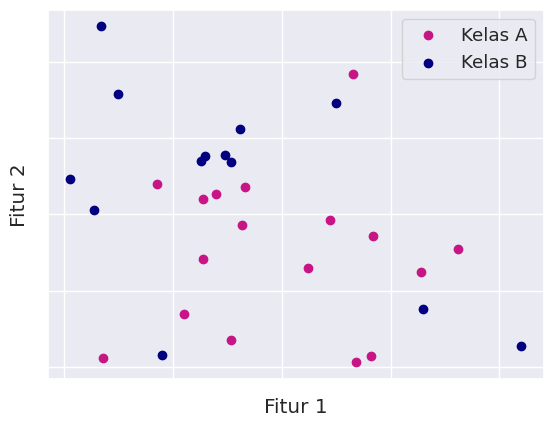

In [556]:
import matplotlib.pyplot as plt

# Definisikan warna untuk setiap kelas
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# Kelompokkan label berdasarkan nama kelas
gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

# Plot
plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

**Penjelasan:**

Kode tersebut digunakan untuk memvisualisasikan data dua dimensi dengan dua kelas berbeda menggunakan scatter plot.
* **import matplotlib.pyplot as plt:** Mengimpor modul matplotlib.pyplot, yang digunakan untuk membuat plot.
* **colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}:**
  * Bagian ini mendefinisikan warna untuk setiap kelas:
    - class_a (Kelas A) menggunakan warna 'MediumVioletRed'.
    - class_b (Kelas B) menggunakan warna 'Navy'.
* **Mengelompokkan Label Berdasarkan Nama Kelas:**
  ```phyton
  gb = df_label.groupby(['Label'])
  class_a = gb.get_group('Kelas A')
  class_b = gb.get_group('Kelas B')
  ```

  * Mengelompokkan data berdasarkan kolom 'Label' menggunakan metode groupby dari DataFrame df_label. Kemudian, data dari masing-masing kelas diambil menggunakan metode get_group:
    - class_a berisi data dari 'Kelas A'.
    - class_b berisi data dari 'Kelas B'.
* **Membuat Scatter Plot:**
  ```phyton
  plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])
  plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])
  ```

  * Membuat scatter plot untuk masing-masing kelas:
    - Data dari class_a diplot menggunakan warna colors['class_a'] (MediumVioletRed).
    - Data dari class_b diplot menggunakan warna colors['class_b'] (Navy).
* **Menambahkan Label dan Legenda pada Plot:**
  ```phyton
  plt.xlabel('Fitur 1')
  plt.ylabel('Fitur 2')
  plt.legend(['Kelas A', 'Kelas B'])
  ```

  * Menambahkan label pada sumbu x (Fitur 1) dan sumbu y (Fitur 2). Selain itu, legenda untuk plot ditambahkan untuk menunjukkan warna yang mewakili masing-masing kelas ('Kelas A' dan 'Kelas B').
* **menghilangkan Label pada Sumbu X dan Y:**
  ```phyton
  plt.gca().axes.xaxis.set_ticklabels([])
  plt.gca().axes.yaxis.set_ticklabels([])
  ```

  * Menghilangkan label pada sumbu x dan sumbu y dengan mengosongkan daftar label tick.
* **plt.show():** Menampilkan plot yang telah dibuat.




**Klasifikasi Multinomial Naive Bayes**

In [557]:
from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi

# Inisiasi obyek MultinomialNB
mnb = MultinomialNB()

# Kita dapat langsung menggunakan fitur X dan label y
# hasil dari proses pembuatan data dummy

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = mnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.7142857142857143
Hasil akurasi data test: 0.7777777777777778


**Penjelasan:**

Kode tersebut digunakan untuk membangun dan mengevaluasi model klasifikasi menggunakan algoritma Naive Bayes tipe Multinomial (MultinomialNB) dengan dataset yang sudah ada (X dan y).
* **Mengimpor modul:**
  ```phyton
  from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB
  from sklearn.model_selection import train_test_split
  from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi
  ```

  * Mengimpor kelas MultinomialNB dari scikit-learn untuk membuat model Multinomial Naive Bayes, train_test_split untuk membagi dataset menjadi data latih dan data uji, serta accuracy_score untuk menghitung akurasi model.
* **mnb = MultinomialNB():** membuat sebuah instance dari kelas MultinomialNB.
* **X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30):**
  * **X_train dan y_train:** Data latih yang digunakan untuk melatih model.
  * **X_test dan y_test:** Data uji yang digunakan untuk menguji model.
  * **test_size=0.3:** Menentukan bahwa 30% dari dataset akan digunakan sebagai data uji, sementara 70% akan digunakan sebagai data latih.
  * **random_state=30:** Menentukan seed untuk pengacakan, sehingga hasil pembagian data dapat direproduksi.
* **mnb.fit(X_train, y_train):** Melatih model Multinomial Naive Bayes menggunakan data latih (X_train dan y_train).
* **y_train_pred = mnb.predict(X_train):** Memprediksi label untuk data latih (X_train) menggunakan model yang sudah dilatih.
* **acc_train = accuracy_score(y_train, y_train_pred):** Menghitung akurasi dari prediksi data latih dengan membandingkan label asli (y_train) dengan label yang diprediksi (y_train_pred).
* **y_test_pred = mnb.predict(X_test):** Memprediksi label untuk data uji (X_test) menggunakan model yang sudah dilatih.
* **acc_test = accuracy_score(y_test, y_test_pred):** Menghitung akurasi dari prediksi data uji dengan membandingkan label asli (y_test) dengan label yang diprediksi (y_test_pred).
* **print(f'Hasil akurasi data train: {acc_train}'), print(f'Hasil akurasi data test: {acc_test}'):** Mencetak akurasi dari data latih dan data uji.


**Klasifikasi Gaussian Naive Bayes**

In [558]:
from sklearn.naive_bayes import GaussianNB # class untuk model GaussianNB

# Inisiasi obyek Gaussian
gnb = GaussianNB()

# Kita menggunakan split data training dan testing
# yang sama dengan model multinomial

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_gnb = gnb.predict(X_train)

# Evaluasi akurasi training
acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)

# Prediksi test data
y_test_pred_gnb = gnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

# Print hasil evaluasi
print(f'Hasil akurasi data train (Gaussian): {acc_train_gnb}')
print(f'Hasil akurasi data test (Gaussian): {acc_test_gnb}')

Hasil akurasi data train (Gaussian): 0.7142857142857143
Hasil akurasi data test (Gaussian): 0.6666666666666666


**Penjelasan:**

Kode tersebut digunakan untuk membangun dan mengevaluasi model klasifikasi menggunakan algoritma Naive Bayes tipe Gaussian (GaussianNB) dengan dataset yang sudah ada (X_train, X_test, y_train, y_test).
* **from sklearn.naive_bayes import GaussianNB:** Mengimpor kelas GaussianNB dari scikit-learn untuk membuat model Gaussian Naive Bayes.
* **gnb = GaussianNB():** Membuat sebuah instance dari kelas GaussianNB.
* **gnb.fit(X_train, y_train):** Melatih model Gaussian Naive Bayes menggunakan data latih (X_train dan y_train).
* **y_train_pred_gnb = gnb.predict(X_train):** memprediksi label untuk data latih (X_train) menggunakan model yang sudah dilatih.
* **acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb):** Menghitung akurasi dari prediksi data latih dengan membandingkan label asli (y_train) dengan label yang diprediksi (y_train_pred_gnb).
* **y_test_pred_gnb = gnb.predict(X_test):** Memprediksi label untuk data uji (X_test) menggunakan model yang sudah dilatih.
* **acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb):** Menghitung akurasi dari prediksi data uji dengan membandingkan label asli (y_test) dengan label yang diprediksi (y_test_pred_gnb).
* **print(f'Hasil akurasi data train (Gaussian): {acc_train_gnb}'), print(f'Hasil akurasi data test (Gaussian): {acc_test_gnb}'):** Mencetak akurasi dari data latih dan data uji untuk model Gaussian Naive Bayes.


# **Praktikum 4**
Klasifikasi Naive Bayes Pada Data Multinomial

Pada percobaan ini, kita akan menggunakan nilai multinomial untuk melakukan klasifikasi dengan Naive Bayes. Nilai multinomial adalah data yang nilainya didapatkan dari proses menghitung. Sehingga, pada konteks fitur, nilai multinomial fitur berdasarkan proses perhitungan (counting) probabilitas kemunculan fitur tersebut dalam sebuah data. Contoh klasik fitur multinomial adalah perhitungan jumlah kata pada klasifikasi teks.Pada percobaan ini, kasus klasifikasi teks diberikan untuk mempermudah pemahaman terhadap algoritma Naive Bayes tipe Multinomial.

Kita akan menggunakan data spam.csv yang berisi data teks sms dengan label spam dan ham. Spam adalah sms sampah, sedangkan ham adalah sebaliknya



**Load Data**

Pada tahap ini kita akan loading data ke dalam data frame dan melakukan inspeksi sederhana untuk memastikan apakah kita perlu proses pra pengolahan data sebelum melakukan ekstraksi fitur dan permodelan

In [559]:
import numpy as np
import pandas as pd

df = pd.read_csv('dataset/spam.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8

df.head()

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

**Penjelasan:**

Kode tersebut digunakan untuk membaca data dari file CSV bernama "spam.csv" dan menampilkan 5 baris pertama dari data tersebut.
* **import numpy as np:** Mengimpor library NumPy dan memberinya alias np. NumPy biasanya digunakan untuk operasi numerik di Python, meskipun tidak digunakan secara langsung di potongan kode ini.
* **import pandas as pd:** Mengimpor library Pandas dan memberinya alias pd. Pandas digunakan untuk manipulasi dan analisis data.
* **df = pd.read_csv('dataset/spam.csv', encoding='latin-1'):**
  * Membaca file CSV "spam.csv" yang berada di dalam folder "dataset" dan menyimpannya dalam DataFrame Pandas bernama df.
  * **encoding='latin-1':** Menentukan encoding file CSV. Encoding ini digunakan karena file tidak menggunakan encoding standar UTF-8.
* **df.head():** Menampilkan 5 baris pertama dari DataFrame df.

Terdapat 3 kolom yang tidak bermanfaat untuk proses selanjutnya, maka kita perlu membuang kolom tersebut. Selain itu, untuk memudahkan pembacaan data, kita juga akan mengubah nama kolom **v1** yang berupa label dan **v2** yang berupa teks sms

**Pra Pengolahan Data**

Beberapa hal yang akan dilakukan pada tahap ini yaitu,
1. Drop kolom yang tidak digunakan
2. Ubah nama kolom v1 (label) dan v2 (teks sms)
3. Inspeksi Data
4. Encode label
5. Memisahkan fitur dengan label

**Drop Kolom**

In [560]:
# Drop 3 kolom terakhir dengan fungsi iloc
df = df.drop(df.iloc[:,2:], axis=1)

# Cek data
df.head()

v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

**Penjelasan:**

Kode tersebut digunakan untuk menghapus 3 kolom terakhir dari DataFrame df dan menampilkan 5 baris pertama dari DataFrame yang telah dimodifikasi.
* **df = df.drop(df.iloc[:,2:], axis=1):**
  * Menghapus kolom dari DataFrame df.
  * **df.iloc[:,2:]:** Memilih semua baris (:) dan kolom mulai dari kolom ke-3 hingga kolom terakhir (2:).
  * **axis=1:** Menentukan bahwa operasi dilakukan pada kolom (1 untuk kolom, 0 untuk baris).
* **df.head():** Menampilkan 5 baris pertama dari DataFrame df.

Jadi, kode tersebut berguna untuk membersihkan data dengan menghapus kolom yang tidak relevan atau tidak dibutuhkan untuk analisis selanjutnya.

**Ubah Nama Kolom V1 dan V2**

In [561]:
# Data untuk rename kolom v1 dan v2
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

# Rename nama kolom v1 dan v2
df = df.rename(columns=new_cols)

# cek data
df.head()

Labels                                                SMS
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...

**Penjelasan:**

Kode tersebut digunakan untuk mengubah nama kolom 'v1' menjadi 'Labels' dan kolom 'v2' menjadi 'SMS' pada DataFrame df, lalu menampilkan 5 baris pertama dari DataFrame yang sudah diubah.
* **new_cols = {'v1': 'Labels', 'v2': 'SMS'}:** Membuat dictionary new_cols yang memetakan nama kolom lama ('v1' dan 'v2') ke nama kolom baru ('Labels' dan 'SMS').
* **df = df.rename(columns=new_cols):** Mengubah nama kolom pada DataFrame df menggunakan dictionary new_cols.
* **df.head():** Menampilkan 5 baris pertama dari DataFrame df.

Jadi, kode tersebut berguna untuk memberikan nama kolom yang lebih deskriptif dan mudah dipahami. Mengubah 'v1' menjadi 'Labels' dan 'v2' menjadi 'SMS' membuat DataFrame lebih mudah diinterpretasi.

**Inspeksi Data**

In [562]:
# Cek Jumlah Data Per Kelas
print(df['Labels'].value_counts())
print('\n')

# Cek Kelengkapan Data
print(df.info())
print('\n')

# Cek Statistik Deskriptif
print(df.describe())

Labels
ham     4825
spam     747
Name: count, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


       Labels                     SMS
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


**Penjelasan:**

Kode tersebut digunakan untuk melakukan inspeksi data pada DataFrame df dengan menampilkan beberapa informasi penting tentang data tersebut.
* **print(df['Labels'].value_counts()):** Menampilkan jumlah data untuk setiap kelas (nilai unik) pada kolom 'Labels'. Ini memberikan gambaran tentang distribusi kelas pada dataset, misalnya berapa banyak data yang termasuk dalam kelas "spam" dan berapa banyak yang termasuk dalam kelas "ham".
* **print('\n'):** Menampilkan baris kosong untuk memisahkan output.
* **print(df.info()):** Menampilkan informasi umum tentang DataFrame df, termasuk:
  * Jumlah baris dan kolom.
  * Nama kolom dan tipe data masing-masing kolom.
  * Jumlah data non-null pada setiap kolom.
  * Penggunaan memori.
* **print('\n'):** Menampilkan baris kosong.
* **print(df.describe()):** Menampilkan statistik deskriptif untuk kolom numerik pada DataFrame df, termasuk:
  * **count:** Jumlah data.
  * **mean:** Rata-rata.
  * **std:** Standar deviasi.
  * **min:** Nilai minimum.
  * **25%:** Kuartil pertama (persentil ke-25).
  * **50%:** Median (persentil ke-50).
  * **75%:** Kuartil ketiga (persentil ke-75).
  * **max:** Nilai maksimum.

Jadi, kode tersebut berguna untuk memahami karakteristik data sebelum melakukan analisis lebih lanjut. Informasi seperti jumlah data per kelas, kelengkapan data, dan statistik deskriptif membantu dalam mengidentifikasi potensi masalah pada data (misalnya, data yang tidak seimbang, missing values) dan menentukan langkah preprocessing yang dibutuhkan.

**Encode Label**

In [563]:
# Data untuk label
new_labels = {
    'spam': 1,
    'ham': 0
}

# Encode label
df['Labels'] = df['Labels'].map(new_labels)

# Cek data
df.head()

Labels                                                SMS
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...

**Penjelasan:**

Kode tersebut digunakan untuk mengubah label pada kolom 'Labels' dari bentuk teks ('spam' dan 'ham') menjadi bentuk numerik (1 dan 0), kemudian menampilkan 5 baris pertama dari DataFrame yang telah diubah.
* **new_labels = {'spam': 1, 'ham': 0}:** Membuat dictionary new_labels yang memetakan label teks 'spam' ke angka 1 dan 'ham' ke angka 0.
* **df['Labels'] = df['Labels'].map(new_labels):**
  * Mengubah nilai pada kolom 'Labels' di DataFrame df menggunakan fungsi map dan dictionary new_labels.
  * Fungsi map akan mengganti setiap label teks pada kolom 'Labels' dengan nilai numerik yang sesuai dari dictionary new_labels.
* **df.head():** Menampilkan 5 baris pertama dari DataFrame df.

**Memisahkan Fitur dengan Label**

In [564]:
X = df['SMS'].values
y = df['Labels'].values

**Penjelasan:**

Kode tersebut digunakan untuk memisahkan fitur (SMS) dan label (Labels) dari DataFrame df ke dalam variabel terpisah X dan y.
* **X = df['SMS'].values:** Mengambil nilai dari kolom 'SMS' pada DataFrame df dan menyimpannya dalam array NumPy X. Array X sekarang berisi teks SMS dari setiap baris pada dataset.
* **y = df['Labels'].values:** Mengambil nilai dari kolom 'Labels' pada DataFrame df dan menyimpannya dalam array NumPy y. Array y sekarang berisi label numerik (0 atau 1) yang sesuai dengan setiap teks SMS

**Ekstraksi fitur**

Ekstraksi fitur untuk setiap SMS akan menggunakan konsep Bag of Words. Kita dapat menggunakan fungsi CountVectorizer dari scikit-learn. Akan tetapi untuk mencegah **leaking information** kita akan melakukan split data terlebih dahulu, baru melakukan transformasi terhadap data training dan testing.

In [565]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Inisiasi CountVectorizer
bow = CountVectorizer()

# Fitting dan transform X_train dengan CountVectorizer
X_train = bow.fit_transform(X_train)

# Transform X_test
# Mengapa hanya transform? Alasan yang sama dengan kasus pada percobaan ke-3
# Kita tidak menginginkan model mengetahui paramter yang digunakan oleh CountVectorizer untuk fitting data X_train
# Sehingga, data testing dapat tetap menjadi data yang asing bagi model nantinya
X_test = bow.transform(X_test)

In [566]:
print(len(bow.get_feature_names_out())) # Use get_feature_names_out() instead of get_feature_names()
print(f'Dimensi data: {X_train.shape}')

7727
Dimensi data: (4457, 7727)


**Penjelasan:**

Kode tersebut digunakan untuk memisahkan data menjadi data training dan testing, kemudian mengubah teks SMS menjadi representasi numerik menggunakan CountVectorizer.
* **from sklearn.model_selection import train_test_split:** Mengimpor fungsi train_test_split dari library scikit-learn (sklearn) untuk memisahkan data.
* **from sklearn.feature_extraction.text import CountVectorizer:** Mengimpor class CountVectorizer dari scikit-learn untuk mengubah teks menjadi representasi numerik (Bag-of-Words).
* **X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50):**
  * Memisahkan data fitur (X) dan label (y) menjadi data training dan data testing.
  * **test_size=0.2:** 20% data akan digunakan sebagai data testing.
  * **random_state=50:** Menentukan seed untuk generator angka acak agar hasil pemisahan data tetap sama setiap kali dijalankan.
* **bow = CountVectorizer():** Membuat objek CountVectorizer. CountVectorizer akan menghitung frekuensi kemunculan setiap kata dalam dokumen (dalam hal ini, setiap SMS) dan membuat matriks representasi Bag-of-Words.
* **X_train = bow.fit_transform(X_train):**
  * Melakukan fitting CountVectorizer pada data training (X_train) dan mentransform data training menjadi representasi Bag-of-Words.
  * Fitting berarti mempelajari kosakata (vocabulary) dari data training, yaitu daftar semua kata unik yang muncul dalam data.
  * Transform berarti mengubah setiap SMS dalam data training menjadi vektor numerik berdasarkan frekuensi kata-kata dalam kosakata.
* **X_test = bow.transform(X_test):**
  * Mentransform data testing (X_test) menggunakan CountVectorizer yang telah difitting pada data training.
  * Penting untuk diingat bahwa kita hanya melakukan transform pada data testing, bukan fit_transform. Ini memastikan bahwa kosakata yang digunakan untuk data testing sama dengan kosakata yang dipelajari dari data training.

**Training dan Evaluasi Model**

Kita akan menggunakan algoritma Multinomial Naive Bayes. Fungsi MultinomialNB dari scikit-learn dapat digunakan pada kasus ini.

In [567]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.9946152120260264
Hasil akurasi data test: 0.9775784753363229


**Penjelasan:**

Kode tersebut digunakan untuk membuat, melatih, dan mengevaluasi model Multinomial Naive Bayes untuk klasifikasi spam.
* **from sklearn.naive_bayes import MultinomialNB:** Mengimpor class MultinomialNB dari scikit-learn untuk membuat model Naive Bayes.
* **from sklearn.metrics import accuracy_score:** Mengimpor fungsi accuracy_score dari scikit-learn untuk menghitung akurasi model.
* **mnb = MultinomialNB():** Membuat objek MultinomialNB (model Naive Bayes).
* **mnb.fit(X_train, y_train):** Melatih model Naive Bayes (mnb) menggunakan data training (X_train dan y_train).
* **y_pred_train = mnb.predict(X_train):** Melakukan prediksi pada data training menggunakan model yang telah dilatih.
* **acc_train = accuracy_score(y_train, y_pred_train):** Menghitung akurasi model pada data training.
* **y_pred_test = mnb.predict(X_test):** Melakukan prediksi pada data testing menggunakan model yang telah dilatih.
* **acc_test = accuracy_score(y_test, y_pred_test):** Menghitung akurasi model pada data testing.
* **print(f'Hasil akurasi data train: {acc_train}'):** Menampilkan akurasi model pada data training.
* **print(f'Hasil akurasi data test: {acc_test}'):** Menampilkan akurasi model pada data testing.

# **Praktikum 5**
Klasifikasi Citra Siang dan Malam

Pada percobaan ini kita akan mencoba melakukan klasifikasi pada dua label citra, yaitu siang dan malam. Percobaan ini akan memberikan pengalaman bagi Anda untuk melakukan proses pra pengolahan data, ekstraksi fitur, dan melakukan klasifikasi dengan menggunakan classifier sederhana dan SVM.

Unduh dataset berikut,

**Langkah 0 - Import Library**

In [568]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

**Penjelasan:**

Kode tersebut mengimpor beberapa library yang umum digunakan untuk pengolahan gambar dan data di Python. Berikut penjelasan singkat untuk setiap library yang diimpor:
* **from pathlib import Path:** Library ini menyediakan cara yang lebih objek-oriented untuk berinteraksi dengan file dan direktori, khususnya untuk mendapatkan informasi path, membuat direktori, atau memeriksa eksistensi file.
* **import matplotlib.image as mpimg:** Modul ini dari library Matplotlib digunakan untuk membaca dan memanipulasi gambar. mpimg umumnya digunakan untuk membaca gambar dan menampilkannya menggunakan Matplotlib.
* **import matplotlib.pyplot as plt:** Modul ini, juga dari Matplotlib, digunakan untuk membuat visualisasi data seperti plot dan grafik. plt menyediakan fungsi-fungsi untuk membuat berbagai jenis plot, mengkustomisasi tampilan plot, dan menampilkannya.
* **import cv2:** OpenCV (cv2) adalah library yang sangat populer untuk computer vision. Library ini menyediakan banyak fungsi untuk pengolahan gambar dan video, seperti membaca gambar, menampilkan gambar, filtering, deteksi objek, dan banyak lagi.
* **import random:** Modul ini menyediakan fungsi-fungsi untuk menghasilkan angka acak. Modul ini sering digunakan untuk sampling data, mengacak urutan data, atau simulasi.
* **import numpy as np:** NumPy adalah library fundamental untuk komputasi numerik di Python. NumPy menyediakan struktur data array multidimensi yang efisien dan banyak fungsi matematika untuk operasi pada array.
* **import pandas as pd:** Pandas adalah library yang powerful untuk manipulasi dan analisis data. Pandas menyediakan struktur data DataFrame yang fleksibel dan banyak fungsi untuk membaca data, membersihkan data, memanipulasi data, dan menganalisis data.

Lakukan ekstraksi data gambar, kemudian definisikan lokasi gambar. Pada contoh ini, folder gambar berlokasi sama dengan lokasi file python

In [569]:
# Image directories
train_dir = "images/training/"
test_dir = "images/test/"

**Penjelasan:**

Kode tersebut mendefinisikan variabel train_dir dan test_dir yang menyimpan lokasi direktori gambar untuk pelatihan (training) dan pengujian (testing).
* **train_dir = "images/training/":** Variabel ini menyimpan alamat direktori tempat gambar-gambar untuk pelatihan disimpan. Direktori ini kemungkinan besar berisi banyak subdirektori, di mana setiap subdirektori mewakili satu kelas atau kategori objek dalam gambar.
* **test_dir = "images/test/":** Variabel ini menyimpan alamat direktori tempat gambar-gambar untuk pengujian disimpan. Struktur direktori ini kemungkinan besar mirip dengan train_dir.

**Langkah 1 - Load Data dan Visualisasikan**

Buatlah fungsi untuk membuat daftar seluruh path dari gambar.

In [570]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

**Penjelasan:**

Kode tersebut mendefinisikan sebuah fungsi bernama load_dataset yang digunakan untuk membaca gambar-gambar dari direktori dan mengembalikan daftar gambar beserta labelnya.
* **def load_dataset(img_dir)::** Mendefinisikan fungsi load_dataset yang menerima satu argumen img_dir, yaitu alamat direktori tempat gambar-gambar disimpan.
* **p = Path(img_dir):** Membuat objek Path dari alamat direktori yang diberikan. Objek Path memudahkan navigasi dan manipulasi direktori dan file.
* **dirs = p.glob('*'):** Mengambil semua direktori yang ada di dalam direktori img_dir. * merupakan wildcard yang berarti "semua direktori".
* **img_list = []:** Membuat list kosong bernama img_list yang akan digunakan untuk menyimpan gambar dan labelnya.
* **for dir in dirs::** Melakukan iterasi (perulangan) untuk setiap direktori yang ditemukan.
  * **label = str(dir).split('/')[-1]**: Mengambil nama direktori dan menggunakannya sebagai label untuk gambar-gambar di dalam direktori tersebut.
  * **for file in dir.glob('*.jpg')::** Melakukan iterasi untuk setiap file JPG di dalam direktori.
    - **img = mpimg.imread(file):** Membaca gambar menggunakan mpimg.imread.
    - **if not img is None::** Memeriksa apakah gambar berhasil dibaca.
      - img_list.append((img, label)): Menambahkan gambar dan labelnya ke dalam img_list.
* **return img_list:** Mengembalikan list img_list yang berisi pasangan gambar dan label.

Load gambar training

In [571]:
# Load training data
train_img = load_dataset(train_dir)

**Penjelasan:**

Kode tersebut memanggil fungsi load_dataset yang telah didefinisikan sebelumnya untuk membaca data gambar dari direktori train_dir dan menyimpan hasilnya dalam variabel train_img.
* **train_img = load_dataset(train_dir):**
  * Memanggil fungsi load_dataset dengan argumen train_dir (direktori gambar training).
  * Fungsi load_dataset akan membaca semua gambar dari subdirektori di dalam train_dir, mengambil label dari nama subdirektori, dan mengembalikan list yang berisi pasangan gambar dan label.
  * Hasil dari fungsi load_dataset disimpan dalam variabel train_img.

Jadi, kode tersebut digunakan untuk memuat data gambar pelatihan (training) ke dalam memori agar dapat digunakan untuk melatih model machine learning. Variabel train_img sekarang berisi daftar gambar dan label yang akan digunakan dalam proses pelatihan model.

Lakukan pengecekan pada salah satu data pada list. List harus berisi tuple dengan dua data, yaitu data gambar dan label dari gambar.

In [572]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[189, 196, 206],
         [161, 168, 178],
         [163, 170, 180],
         ...,
         [172, 187, 194],
         [172, 187, 194],
         [172, 187, 194]],
 
        [[188, 195, 205],
         [161, 168, 178],
         [163, 170, 180],
         ...,
         [172, 187, 194],
         [172, 187, 194],
         [172, 187, 194]],
 
        [[187, 194, 204],
         [160, 167, 177],
         [164, 171, 181],
         ...,
         [172, 187, 194],
         [172, 187, 194],
         [172, 187, 194]],
 
        ...,
 
        [[ 46,  42,  39],
         [ 31,  27,  24],
         [ 29,  25,  22],
         ...,
         [ 37,  29,  26],
         [ 37,  32,  28],
         [ 39,  34,  30]],
 
        [[ 50,  46,  43],
         [ 34,  30,  27],
         [ 30,  26,  23],
         ...,
         [ 35,  27,  24],
         [ 35,  30,  26],
         [ 36,  31,  27]],
 
        [[ 52,  48,  45],
         [ 36,  32,  29],
         [ 31,  27,  24],
         ...,
         [ 32,  24,  21],
  

**Penjelasan:**

Kode tersebut digunakan untuk menampilkan elemen pertama dari list train_img.
* **train_img[0]:** Mengakses elemen dengan indeks 0 (elemen pertama) dari list train_img.

Jadi, kode tersebut berguna untuk memeriksa isi dari data training yang telah dimuat. Karena fungsi load_dataset mengembalikan list yang berisi tuple (gambar, label), maka elemen pertama dari train_img akan berupa tuple yang terdiri dari:
* Array yang merepresentasikan gambar.
* Label dari gambar tersebut (dalam bentuk teks).

Cek ukuran gambar secara acak

In [573]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 39
(458, 800, 3)


**Penjelasan:**

Kode tersebut digunakan untuk memilih satu gambar secara acak dari data training (train_img) dan menampilkan ukuran (dimensi) gambar tersebut.
* **pick_random = np.random.randint(0, len(train_img)):** Menghasilkan angka acak antara 0 (inklusif) dan panjang list train_img (eksklusif) menggunakan fungsi np.random.randint. Angka acak ini akan digunakan sebagai indeks untuk memilih gambar dari list.
* **print(f'Image {pick_random}'):** Menampilkan indeks gambar yang dipilih secara acak.
* **print(train_img[pick_random][0].shape):**
  * Mengakses elemen dengan indeks pick_random dari list train_img.
  * **[0]** mengakses elemen pertama dari tuple (gambar, label), yaitu gambar.
  * **.shape** menampilkan ukuran (dimensi) gambar, biasanya dalam format (tinggi, lebar, channel).

Tampilkan gambar untuk inspeksi secara visual. Buatlah fungsi untuk membantu memvisualkan gambar

In [574]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    plt.grid(False)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

**Penjelasan:**

Kode tersebut mendefinisikan fungsi random_img_viz yang digunakan untuk menampilkan gambar secara acak dari sebuah list gambar dan labelnya.
* **def random_img_viz(img_list)::** Mendefinisikan fungsi random_img_viz yang menerima satu argumen, yaitu img_list yang berisi daftar gambar dan label.
* **rand_num = np.random.randint(0, len(img_list)):** Menghasilkan angka acak antara 0 (inklusif) dan panjang list img_list (eksklusif). Angka acak ini akan digunakan sebagai indeks untuk memilih gambar secara acak dari list.
* **img = img_list[rand_num][0]:** Mengambil gambar dari tuple (gambar, label) pada indeks rand_num dalam img_list.
* **label = img_list[rand_num][1]:** Mengambil label dari tuple (gambar, label) pada indeks rand_num dalam img_list.
* **label_str = 'day' if label == 1 else 'night':**
  * Mengubah label numerik (1 atau 0) menjadi label teks ('day' atau 'night').
  * Diasumsikan bahwa label 1 merepresentasikan "day" dan label 0 merepresentasikan "night".
* **plt.imshow(img):** Menampilkan gambar menggunakan Matplotlib.
* **print(f'Shape\t: {img.shape}'):** Menampilkan ukuran (dimensi) gambar.
* **print(f'Label\t: {label}'):** Menampilkan label gambar.

Lakukan visualisasi gambar secara acak

Shape	: (531, 800, 3)
Label	: night


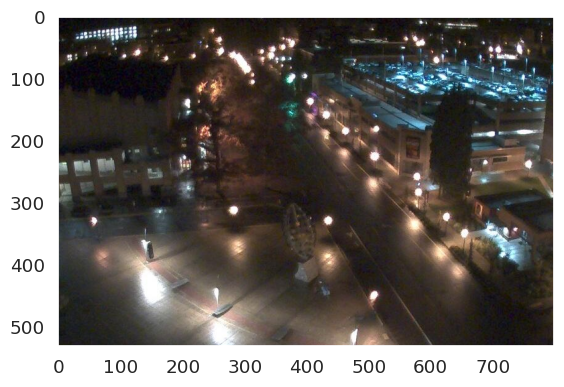

In [575]:
random_img_viz(train_img)

**Penjelasan:**

Kode tersebut memanggil fungsi random_img_viz dengan argumen train_img untuk menampilkan satu gambar dan labelnya secara acak dari data training.
* **random_img_viz(train_img):**
  * Memanggil fungsi random_img_viz yang telah didefinisikan sebelumnya.
  * **train_img** adalah list yang berisi data gambar dan label untuk training.

Ketika kode tersebut dijalankan, fungsi random_img_viz akan:
  * Memilih satu gambar secara acak dari train_img.
  * Menampilkan gambar tersebut menggunakan Matplotlib.
  * Menampilkan ukuran (dimensi) gambar.
  * Menampilkan label gambar (dalam bentuk teks 'day' atau 'night').

**Langkah 3 - Pra Pengolahan Data**

Pada tahap ini, kita akan melakukan dua proses utama, yaitu standardisasi ukuran gambar, dan encoding label gambar.

Bualah fungsi berikut untuk menstandarkan ukuran gambar

In [576]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

**Penjelasan:**

Kode tersebut mendefinisikan fungsi standarized_input yang digunakan untuk mengubah ukuran (resize) gambar menjadi ukuran standar 1100x600 piksel.
* **def standarized_input(image)::** Mendefinisikan fungsi standarized_input yang menerima satu argumen image, yaitu gambar yang akan diubah ukurannya.
* **std_img = cv2.resize(image, (1100,600)):**
  * Menggunakan fungsi cv2.resize dari library OpenCV untuk mengubah ukuran gambar image menjadi lebar 1100 piksel dan tinggi 600 piksel.
  * Hasil resize disimpan dalam variabel std_img.
* **return std_img:** Mengembalikan gambar yang telah diubah ukurannya.

Selanjutnya, buatlah fungsi untuk kebutuhan encoding label

In [577]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

**Penjelasan:**

Kode tersebut mendefinisikan fungsi label_encoder yang digunakan untuk mengubah label teks ("day" atau "night") menjadi label numerik (1 atau 0).
* **def label_encoder(label)::** Mendefinisikan fungsi label_encoder yang menerima satu argumen label, yaitu label dalam bentuk teks.
* **num_val = 0:** Menetapkan nilai awal variabel num_val menjadi 0. Ini berarti label "night" akan di-encode sebagai 0.
* **if(label == 'day')::** Memeriksa apakah label sama dengan "day".
  * **num_val = 1:** Jika label sama dengan "day", maka num_val diubah menjadi 1.
* **return num_val:** Mengembalikan nilai numerik (num_val) yang telah di-encode.

Terakhir, buatlah fungsi untuk melakukan kedua hal tersebut secara sekaligus untuk semua gambar dalam list.

In [578]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

**Penjelasan:**

Kode tersebut mendefinisikan fungsi preprocess yang digunakan untuk melakukan preprocessing pada data gambar dan label. Fungsi ini melakukan dua hal utama:
  * **Standarisasi ukuran gambar:** Mengubah ukuran semua gambar menjadi ukuran standar 1100x600 piksel menggunakan fungsi standarized_input.
  * **Encoding label:** Mengubah label teks ("day" atau "night") menjadi label numerik (1 atau 0) menggunakan fungsi label_encoder.
Berikut penjelasan lebih detail:

* **def preprocess(img_list)::** Mendefinisikan fungsi preprocess yang menerima satu argumen img_list, yaitu list yang berisi pasangan gambar dan label.
* **std_img_list = []:** Membuat list kosong std_img_list yang akan digunakan untuk menyimpan gambar dan label yang telah di-preprocess.
* **for item in img_list::** Melakukan iterasi untuk setiap elemen (gambar dan label) dalam img_list.
  * **image = item[0]:** Mengambil gambar dari tuple.
  * **label = item[1]:** Mengambil label dari tuple.
  * **std_img = standarized_input(image):** Memanggil fungsi standarized_input untuk mengubah ukuran gambar.
  * **img_label = label_encoder(label):** Memanggil fungsi label_encoder untuk meng-encode label.
  * **std_img_list.append((std_img, img_label)):** Menambahkan gambar dan label yang telah di-preprocess ke dalam std_img_list.
* **return std_img_list:** Mengembalikan list std_img_list.

Lakukan pra pengolahan data pada data training.

In [579]:
train_std_img_list = preprocess(train_img)

**Penjelasan:**

Kode tersebut memanggil fungsi preprocess untuk melakukan preprocessing pada data gambar training (train_img) dan menyimpan hasilnya dalam variabel train_std_img_list.
* **train_std_img_list = preprocess(train_img):**
  * Memanggil fungsi preprocess dengan argumen train_img, yaitu list yang berisi pasangan gambar dan label data training.
  * Fungsi preprocess akan melakukan dua hal:
    - Menstandarisasi ukuran semua gambar menjadi 1100x600 piksel.
    - Mengubah label teks ("day" atau "night") menjadi label numerik (1 atau 0).
  * List yang berisi gambar dan label yang telah di-preprocess disimpan dalam variabel train_std_img_list.

Lakukan pengecekan ukuran gambar secara acak

In [580]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 6
(600, 1100, 3)


**Penjelasan:**

Kode tersebut digunakan untuk memilih satu gambar secara acak dari data training yang telah di-preprocess (train_std_img_list) dan menampilkan ukuran (dimensi) gambar tersebut.
* **pick_random = np.random.randint(0, len(train_std_img_list)):**
  * Menghasilkan angka acak antara 0 (inklusif) dan panjang list train_std_img_list (eksklusif) menggunakan fungsi np.random.randint.
  * Angka acak ini akan digunakan sebagai indeks untuk memilih gambar dari list.
* **print(f'Image {pick_random}'):** Menampilkan indeks gambar yang dipilih secara acak.
* **print(train_std_img_list[pick_random][0].shape):**
  * Mengakses elemen dengan indeks pick_random dari list train_std_img_list.
  * **[0]** mengakses elemen pertama dari tuple (gambar, label), yaitu gambar.
  * **.shape** menampilkan ukuran (dimensi) gambar, yang seharusnya adalah (600, 1100, 3) karena semua gambar telah diubah ukurannya menjadi 1100x600 piksel dengan 3 channel warna (RGB).

Jadi, kode tersebut berguna untuk memeriksa apakah proses preprocessing (standarisasi ukuran gambar) telah berhasil dilakukan. Dengan menampilkan ukuran gambar yang dipilih secara acak, kita dapat memastikan bahwa semua gambar dalam train_std_img_list memiliki ukuran yang sama (600, 1100, 3).

**WARNING!** Perhatikan ukuran (shape) dari data image. Atribut shape akan menampilkan dalam konteks baris (height) x kolom (width)

Lakukan inspeksi visual dengan fungsi random_img_viz yang telah dibuat sebelumnya pada gambar hasil pra pengolahan.

Shape	: (600, 1100, 3)
Label	: 0


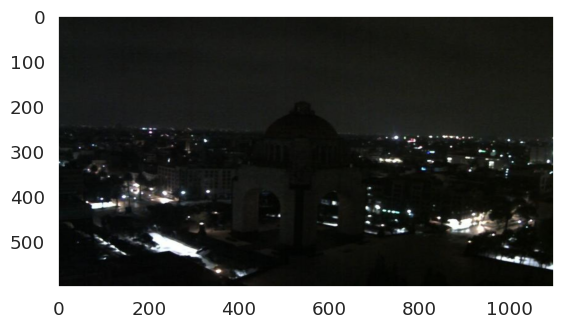

In [581]:
random_img_viz(train_std_img_list)

**Penjelasan:**

Kode tersebut memanggil fungsi random_img_viz untuk menampilkan satu gambar dan labelnya secara acak dari data training yang telah di-preprocess (train_std_img_list).
* **random_img_viz(train_std_img_list):**
  * Memanggil fungsi random_img_viz yang telah didefinisikan sebelumnya.
  * **train_std_img_list** adalah list yang berisi data gambar dan label yang telah di-preprocess (diubah ukurannya dan label di-encode).

Jadi, ketika kode tersebut dijalankan, fungsi random_img_viz akan:
  * Memilih satu gambar secara acak dari train_std_img_list.
  * Menampilkan gambar tersebut menggunakan Matplotlib.
  * Menampilkan ukuran (dimensi) gambar, yang seharusnya 1100x600 piksel.
  * Menampilkan label gambar dalam bentuk angka (0 atau 1).

**Langkah 4 - Ekstraksi Fitur**

Selanjutnya, untuk dapat membadakan antara label satu dengan label yang lain, kita memerlukan sebuah fitur. Fitur adalah penciri dari sebuah data yang dapat digunakan untuk membendakan data satu dengan yang lain. Pada percobaan kali ini, kita akan menggunakan fitur yang sederhana yaitu nilai rata-rata dari tingkat kecerahan gambar (average brightness). Namun sebelum dapat melakukan hal tersebut, kita akan mengubah ruang warna (colorspace) dari RGB menjadi HSV (Hue, Saturation, Value). Hal ini dikarenakan, tingkat kecerahan (brightness) lebih mudah didapatkan dari HSV berdasarkan nilai Valuenya.

Buatlah fungsi berikut untuk mendapatkan nilai rata-rata tingkat kecerahan

In [582]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

**Penjelasan:**

Kode tersebut mendefinisikan fungsi avg_brightness yang digunakan untuk menghitung rata-rata kecerahan (brightness) dari sebuah gambar dengan menggunakan colorspace HSV (Hue, Saturation, Value).
* **def avg_brightness(image)::** Mendefinisikan fungsi avg_brightness yang menerima satu argumen image, yaitu gambar yang akan dihitung rata-rata kecerahannya.
* **img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV):**
  * Mengubah gambar dari colorspace RGB (Red, Green, Blue) ke colorspace HSV (Hue, Saturation, Value) menggunakan fungsi cv2.cvtColor dari OpenCV.
  * Dalam colorspace HSV, komponen Value (V) merepresentasikan kecerahan.
* **sum_brightness = np.sum(img_hsv[:,:,2]):**
  * Menghitung jumlah nilai kecerahan (V) dari semua piksel pada gambar.
  * **img_hsv[:,:,2]** mengambil semua baris dan kolom dari channel ke-3 (V) pada gambar HSV.
* **area = image.shape[0] * image.shape[1]:** Menghitung luas gambar (tinggi x lebar).
* **avg = sum_brightness / area:** Menghitung rata-rata kecerahan dengan membagi jumlah kecerahan dengan luas gambar.
* **return avg:** Mengembalikan nilai rata-rata kecerahan.

Lakukan pengecekan pada gambar secara acak. **INGAT! Gunakan gambar yang telah melalui proses pra pengolahan data!**

Image 145
Avg Brighness: 109.7747


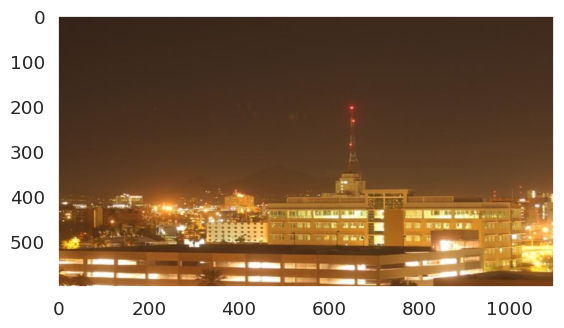

In [583]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.grid(False)
plt.imshow(feature_img)

**Penjelasan:**

Kode tersebut digunakan untuk memilih satu gambar secara acak dari data training yang telah di-preprocess (train_std_img_list), menghitung rata-rata kecerahan gambar tersebut, dan menampilkan gambar beserta nilai rata-rata kecerahannya.
* **rand_img = np.random.randint(0, len(train_std_img_list)):**
  * Menghasilkan angka acak antara 0 (inklusif) dan panjang list train_std_img_list (eksklusif).
  * Angka acak ini digunakan sebagai indeks untuk memilih gambar dari list.
* **feature_img = train_std_img_list[rand_img][0]:** Mengambil gambar dari tuple (gambar, label) pada indeks rand_img dalam train_std_img_list.
* **avg_img = avg_brightness(feature_img):**
Memanggil fungsi avg_brightness untuk menghitung rata-rata kecerahan dari gambar feature_img.
* **print(f'Image {rand_img}'):** Menampilkan indeks gambar yang dipilih.
* **print(f'Avg Brighness: {avg_img:.4f}'):**
Menampilkan rata-rata kecerahan gambar dengan format 4 angka di belakang koma.
* **plt.imshow(feature_img):** Menampilkan gambar menggunakan Matplotlib.

**Langkah 5 - Klasifikasi dengan Metode Threshold**

Pada tahap ini, kita akan melakukan proses klasifikasi sederhana dengan menggunakan nilai ambang batas (threshold) dari nilai rata-rata kecerahan yang kita tentukan sendiri.

Buatlah fungsi berikut,

In [584]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

**Penjelasan:**

Kode tersebut mendefinisikan fungsi predict_label yang digunakan untuk memprediksi label gambar ("day" atau "night") berdasarkan rata-rata kecerahan gambar dan threshold (ambang batas) yang ditentukan.
* **def predict_label(img, threshold)::** Mendefinisikan fungsi predict_label yang menerima dua argumen:
  * **img:** Gambar yang akan diprediksi labelnya.
  * **threshold:** Nilai ambang batas kecerahan.
* **avg = avg_brightness(img):** Memanggil fungsi avg_brightness untuk menghitung rata-rata kecerahan gambar img.
* **pred = 0:** Menetapkan nilai awal variabel pred menjadi 0 (diasumsikan sebagai label untuk "night").
* **if avg > threshold::**
  * Memeriksa apakah rata-rata kecerahan (avg) lebih besar dari threshold.
  * **pred = 1:** Jika rata-rata kecerahan lebih besar dari threshold, maka pred diubah menjadi 1 (diasumsikan sebagai label untuk "day").
* **return pred:** Mengembalikan nilai prediksi (pred).

Jadi, kode tersebut melakukan klasifikasi gambar sederhana berdasarkan rata-rata kecerahan. Threshold digunakan sebagai pembatas untuk menentukan apakah gambar termasuk dalam kelas "day" (cerah) atau "night" (gelap). Jika rata-rata kecerahan gambar di atas threshold, maka gambar diprediksi sebagai "day", jika tidak maka diprediksi sebagai "night".

Lakukan pengecekan prediksi secara acak pada data training

Image 26
Actual label: 1
Predicted label: 0


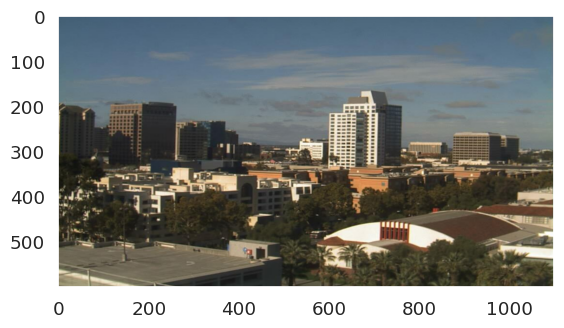

In [585]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.grid(False)
plt.imshow(train_std_img_list[rand_img][0])

**Penjelasan:**

Kode tersebut digunakan untuk menguji fungsi predict_label pada satu gambar yang dipilih secara acak dari data training (train_std_img_list).
* **rand_img = np.random.randint(0, len(train_std_img_list)):** Menghasilkan angka acak untuk memilih gambar dari train_std_img_list.
* **pred = predict_label(train_std_img_list[rand_img][0], threshold=120):**
  * Memanggil fungsi predict_label untuk memprediksi label gambar.
  * Argumen pertama adalah gambar yang dipilih secara acak dari train_std_img_list.
  * threshold=120 menentukan nilai ambang batas kecerahan.
* **print(f'Image {rand_img}'):** Menampilkan indeks gambar yang dipilih.
print(f'Actual label: {train_std_img_list[rand_img][1]}'): Menampilkan label sebenarnya dari gambar.
* **print(f'Predicted label: {pred}'):** Menampilkan label yang diprediksi oleh fungsi predict_label.
* **plt.imshow(train_std_img_list[rand_img][0]):** Menampilkan gambar menggunakan Matplotlib.

Jadi, kode tersebut berguna untuk melihat bagaimana fungsi predict_label bekerja dan mengevaluasi prediksinya secara kualitatif. Dengan membandingkan label sebenarnya dan label prediksi, kita dapat melihat apakah fungsi tersebut dapat mengklasifikasikan gambar dengan benar.

**Langkah 6 - Evaluasi (Manual)**

Selanjutnya kita akan membuat fungsi evaluasi model sederhana, yaitu dengan membandingkan label yang diprediksi benar dengan seluruh data. Ingat kembali konsep ***confussion matrix***.

Buatlah fungsi berikut,

In [586]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

**Penjelasan:**

Kode tersebut mendefinisikan fungsi evaluate yang digunakan untuk mengevaluasi kinerja model klasifikasi gambar dan menampilkan akurasinya. Fungsi ini hampir sama dengan versi sebelumnya, tetapi hanya menampilkan akurasi dan tidak mengembalikan list gambar yang salah klasifikasi.
* **def evaluate(img_list, threshold)::** Mendefinisikan fungsi evaluate.
* **miss_labels = []:** Membuat list kosong miss_labels (meskipun tidak digunakan dalam versi ini).
* **for file in img_list::** Melakukan iterasi untuk setiap gambar dan label dalam img_list.
  * **img = file[0]:** Mengambil gambar.
  * **label = file[1]:** Mengambil label.
  * **pred_label = predict_label(img, threshold):** Memprediksi label gambar.
  * **if pred_label != label::** Memeriksa apakah prediksi salah (kode di dalam if dihapus karena tidak diperlukan).
* **total_img = len(img_list):** Menghitung total gambar.
* **corr_pred = total_img - len(miss_labels):** Menghitung prediksi benar (meskipun miss_labels selalu kosong dalam versi ini).
* **accuracy = corr_pred / total_img:** Menghitung akurasi.
* **print(f'Accuracy: {accuracy:.4f}'):** Menampilkan akurasi dengan 4 angka di belakang koma.

Lakukan evaluasi pada data training dengan nilai ambang batas 120

In [587]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


**Penjelasan:**

Kode tersebut memanggil fungsi evaluate untuk mengevaluasi kinerja model klasifikasi gambar pada data training (train_std_img_list) dan menampilkan akurasinya.
* **evaluate(train_std_img_list, threshold=120):** Memanggil fungsi evaluate dengan dua argumen:
  * **train_std_img_list:** Data training yang berisi gambar dan label yang telah di-preprocess.
  * **threshold=120:** Nilai ambang batas kecerahan yang digunakan dalam fungsi predict_label untuk memprediksi label gambar.

Anda dapat mengubah nilai ambang batas dan amati hasilnya.

Selanjutnya, kita akan melakukan evaluasi pada data testing. Namun sebelumnya, data testing harus diperlakukan sama dengan data training dalam konteks pra progolahan data dan ekstraksi fitur.

In [588]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


**Penjelasan:**

Kode tersebut digunakan untuk mengevaluasi kinerja model klasifikasi gambar pada data testing.
* **test_img = load_dataset(test_dir):** Memuat data gambar dari direktori testing (test_dir) menggunakan fungsi load_dataset.
* **test_std_img_list = preprocess(test_img):** Melakukan preprocessing pada data testing menggunakan fungsi preprocess. Ini termasuk menstandarisasi ukuran gambar dan meng-encode label.
* **evaluate(test_std_img_list, threshold=120):**
  * Mengevaluasi kinerja model pada data testing yang telah di-preprocess (test_std_img_list) menggunakan fungsi evaluate.
  * **threshold=120** menentukan nilai ambang batas kecerahan yang digunakan dalam fungsi predict_label.

**Another Way - Membuat Feature Vectors dan Klasifikasi dengan SVM**

Pada proses klasifikasi sebelumnya, kita hanya membedakan kelas day dan night dengan nilai ambang batas. Cara tersebut memang mudah untuk digunakan, akan tetapi belum tentu secara baik dan general dapat memedakan kedua data. Oleh karena itu, pada bagian ini, kita akan mencoba menggunakan pendekatan lain untuk melakukan proses klasifikasi. Kita akan kembali mulai pada langkah 4

**Langkah 4 alternatif - Membuat Feature Vectors**

Perbedaan mendasar dari langkah 4 sebelumnya adalah, kita akan melakukan tabulasi semua nilai rata-rata kecerahan pada data, dan menyimpannya dalam bentuk tabel. Dalam konteks ini, kita akan membuat tabel dengan kolom fitur dan label.

Buatlah fungsi berikut,

In [589]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

**Penjelasan:**

Kode tersebut merupakan sebuah fungsi bernama extract_avg_bright_feature yang digunakan untuk mengekstrak fitur kecerahan rata-rata dari suatu daftar gambar dan mengembalikannya dalam bentuk DataFrame Pandas.
* **def extract_avg_bright_feature(img_list)::** Mendeklarasikan fungsi dengan nama extract_avg_bright_feature yang menerima satu argumen, yaitu img_list. img_list diasumsikan sebagai daftar di mana setiap elemennya adalah tuple yang berisi gambar dan labelnya.
* **avg_list = []:** Membuat list kosong bernama avg_list untuk menyimpan nilai kecerahan rata-rata dari setiap gambar.
* **labels = []:** Membuat list kosong bernama labels untuk menyimpan label dari setiap gambar.
* **for img in img_list::** Melakukan perulangan untuk setiap gambar dalam img_list.
* **img_avg = avg_brightness(img[0]):** Menghitung kecerahan rata-rata dari gambar menggunakan fungsi avg_brightness (yang tidak didefinisikan dalam kode yang diberikan). Hasilnya disimpan dalam variabel img_avg.
* **img_label = img[1]:** Mengambil label dari tuple gambar dan menyimpannya dalam variabel img_label.
* **avg_list.append(img_avg):** Menambahkan nilai kecerahan rata-rata yang telah dihitung (img_avg) ke dalam avg_list.
* **labels.append(img_label):** Menambahkan label yang telah diekstrak (img_label) ke dalam labels.
* **data = np.column_stack((avg_list, labels)):** Menggabungkan avg_list dan labels menjadi array NumPy 2 dimensi.
* **df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS']):** Membuat DataFrame Pandas dari array NumPy data dengan kolom 'AVG_BRIGHT' untuk kecerahan rata-rata dan 'LABELS' untuk label.
* **return df:** Mengembalikan DataFrame Pandas yang telah dibuat.

Jadi fungsi tersebut dirancang untuk memproses daftar gambar, menghitung kecerahan rata-rata untuk setiap gambar, dan menyimpan nilai kecerahan serta label yang sesuai dalam DataFrame.

Cek hasilnya pada data training,

In [590]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


AVG_BRIGHT  LABELS
0  106.808485     1.0
1  128.062374     1.0
2  105.506424     1.0
3  123.251691     1.0
4  103.368729     1.0

**Penjelasan:**

Kode tersebut digunakan untuk mengekstrak fitur kecerahan rata-rata dari data latih gambar dan menampilkan bentuk (shape) serta 5 baris pertama dari DataFrame yang dihasilkan.
* **train_avg_img = extract_avg_bright_feature(train_std_img_list):**
  * Memanggil fungsi extract_avg_bright_feature dengan argumen train_std_img_list. train_std_img_list diasumsikan sebagai daftar yang berisi tuple gambar dan label dari data latih.
  * Fungsi extract_avg_bright_feature akan menghitung kecerahan rata-rata dari setiap gambar dan mengembalikan DataFrame Pandas yang berisi nilai kecerahan rata-rata dan label.
  * DataFrame yang dikembalikan disimpan dalam variabel train_avg_img.
* **print(f'Shape: {train_avg_img.shape}'):** Menampilkan bentuk (shape) dari DataFrame train_avg_img. Shape menunjukkan jumlah baris dan kolom dalam DataFrame.
* **train_avg_img.head():** Menampilkan 5 baris pertama dari DataFrame train_avg_img. Ini berguna untuk melihat sekilas isi DataFrame dan memastikan bahwa fitur telah diekstrak dengan benar.


Lakukan langkah yang serupa pada data testing

In [591]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


AVG_BRIGHT  LABELS
0  116.048989     1.0
1  132.523694     1.0
2  110.689276     1.0
3  129.345136     1.0
4  137.758344     1.0

**Penjelasan:**

Kode tersebut melakukan hal yang sama seperti kode sebelumnya, tetapi pada data uji. Kode tersebut mengekstrak fitur kecerahan rata-rata dari data uji gambar dan menampilkan bentuk (shape) serta 5 baris pertama dari DataFrame yang dihasilkan.
* **test_avg_img = extract_avg_bright_feature(test_std_img_list):**
  * Memanggil fungsi extract_avg_bright_feature dengan argumen test_std_img_list. test_std_img_list diasumsikan sebagai daftar yang berisi tuple gambar dan label dari data uji.
  * Fungsi extract_avg_bright_feature akan menghitung kecerahan rata-rata dari setiap gambar dan mengembalikan DataFrame Pandas yang berisi nilai kecerahan rata-rata dan label.
  * DataFrame yang dikembalikan disimpan dalam variabel test_avg_img.
* **print(f'Shape: {test_avg_img.shape}'):** Menampilkan bentuk (shape) dari DataFrame test_avg_img. Shape menunjukkan jumlah baris dan kolom dalam DataFrame.
* **test_avg_img.head():** Menampilkan 5 baris pertama dari DataFrame test_avg_img. Ini berguna untuk melihat sekilas isi DataFrame dan memastikan bahwa fitur telah diekstrak dengan benar.


**Langkah 5 alternatif**

Selanjutnya, kita akan membuat model SVM dengan kernel RBF (default) dengan memanfaatkan libary scikit-learn.

In [592]:
# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

**Penjelasan:**

Kode tersebut mengimpor library SVC dari scikit-learn, memisahkan data dan label dari DataFrame, lalu melatih model SVC dengan data training.
* **from sklearn.svm import SVC:** Mengimpor class SVC (Support Vector Classifier) dari modul sklearn.svm. Class ini digunakan untuk membuat model SVM.
* **X_train = train_avg_img.iloc[:,0].values.reshape(-1,1):**
  * Mengambil semua baris ([:]) dan kolom pertama (0) dari DataFrame train_avg_img sebagai data training (X_train).
  * **.values** mengkonversi data menjadi array NumPy.
  * **.reshape(-1, 1)** mengubah bentuk array menjadi satu kolom dengan jumlah baris yang disesuaikan otomatis (-1).
* **y_train = train_avg_img.iloc[:,1]:** Mengambil semua baris ([:]) dan kolom kedua (1) dari DataFrame train_avg_img sebagai label training (y_train).
* **X_test = test_avg_img.iloc[:,0].values.reshape(-1,1):**
  * Mengambil semua baris ([:]) dan kolom pertama (0) dari DataFrame test_avg_img sebagai data testing (X_test).
  * **.values** mengkonversi data menjadi array NumPy.
  * **.reshape(-1, 1)** mengubah bentuk array menjadi satu kolom dengan jumlah baris yang disesuaikan otomatis (-1).
* **y_test = test_avg_img.iloc[:,1]:** Mengambil semua baris ([:]) dan kolom kedua (1) dari DataFrame test_avg_img sebagai label testing (y_test).
* **model = SVC():** Membuat objek SVC dengan parameter default dan menyimpannya dalam variabel model.
* **model.fit(X_train, y_train):** Melatih model SVC (model) menggunakan data training (X_train) dan label training (y_train). Proses ini akan mencari hyperplane optimal yang memisahkan data ke dalam kelas yang berbeda.

Jadi, kode tersebut mempersiapkan data latih dan data uji, membuat model SVM, dan melatih model tersebut dengan data latih. Model yang telah dilatih kemudian dapat digunakan untuk melakukan prediksi pada data uji dan mengevaluasi performanya.

**Langkah 6 alternatif**

Selanjutnya, kita akan melakukan evaluasi pada data training dan testing dengan bantuan library scikit-learn.

In [593]:
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9


**Penjelasan:**

Kode tersebut mengimpor accuracy_score dari scikit-learn, melakukan prediksi pada data latih dan data uji menggunakan model yang telah dilatih, kemudian menghitung dan menampilkan akurasi model pada kedua set data.
* **from sklearn.metrics import accuracy_score:** Mengimpor fungsi accuracy_score dari modul sklearn.metrics. Fungsi ini digunakan untuk menghitung akurasi model.
* **y_train_pred = model.predict(X_train):** Melakukan prediksi pada data latih (X_train) menggunakan model yang telah dilatih (model) dan menyimpan hasil prediksi dalam variabel y_train_pred.
* **acc_train = accuracy_score(y_train, y_train_pred):** Menghitung akurasi model pada data latih dengan membandingkan label sebenarnya (y_train) dengan label prediksi (y_train_pred). Hasilnya disimpan dalam variabel acc_train.
* **y_test_pred = model.predict(X_test):** Melakukan prediksi pada data uji (X_test) menggunakan model yang telah dilatih (model) dan menyimpan hasil prediksi dalam variabel y_test_pred.
* **acc_test = accuracy_score(y_test, y_test_pred):** Menghitung akurasi model pada data uji dengan membandingkan label sebenarnya (y_test) dengan label prediksi (y_test_pred). Hasilnya disimpan dalam variabel acc_test.
* **print(f'Accuracy on train: {acc_train}'):** Menampilkan akurasi model pada data latih.
* **print(f'Accuracy on test: {acc_test}'):** Menampilkan akurasi model pada data uji.

Jadi, kode tersebut mengevaluasi performa model dengan menghitung akurasinya pada data latih dan data uji. Perbandingan akurasi pada kedua set data dapat memberikan informasi tentang kemampuan generalisasi model, yaitu seberapa baik model dapat memprediksi data yang belum pernah dilihat sebelumnya.

# **Tugas 1 (Opsional)**
1. Buatlah model klasifikasi dengan menggunakan SVM untuk data suara, voice.csv.
2. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
  1. Menggunakan data spam.csv
  2. Fitur CountVectorizer dengan mengaktifkan stop_words
  3. Evaluasi hasilnya
3. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
  1. Menggunakan data spam.csv
  2. Fitur TF-IDF dengan mengaktifkan stop_words
  3. Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.
  4. Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

# **Jawaban Tugas 1:**
**1. Buatlah model klasifikasi dengan menggunakan SVM untuk data suara, voice.csv.**
  * **Impor Library**

In [594]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

**Penjelasan:**

Kode tersebut mengimpor library diantaranya:
  * **import numpy as np:** NumPy digunakan untuk komputasi numerik di Python. NumPy menyediakan struktur data yang efisien seperti array dan matriks, serta fungsi matematika untuk beroperasi pada struktur data tersebut.
  * **import pandas as pd:** Pandas digunakan untuk manipulasi dan analisis data. Pandas menyediakan struktur data DataFrame yang fleksibel dan mudah digunakan untuk menyimpan dan mengolah data dalam bentuk tabel.
  * **import matplotlib.pyplot as plt:** Matplotlib adalah library plotting untuk membuat visualisasi data seperti grafik dan diagram.
  * **from scipy import stats:** SciPy adalah library yang digunakan untuk komputasi ilmiah. Modul stats dari SciPy menyediakan fungsi untuk analisis statistik.
  * **import seaborn as sns:** Seaborn adalah library untuk membuat visualisasi data statistik yang menarik dan informatif. Seaborn dibangun di atas Matplotlib dan menyediakan interface tingkat tinggi untuk membuat berbagai jenis plot.

  * **Read Data**

In [595]:
data = pd.read_csv('dataset/voice.csv', encoding='latin-1')
data.head()

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000   male  
1  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632   male  
2  0.271186  0.007990  0.007812  0.015625  0.007812  0.046512   male  
3  0.250000  0.201497  0.007812  0.562500  0.554688  0.247119   male  
4  0.266667  0.712812  0.007812  5.484375  5.476562  0.208274   male  

[5 rows x 21 columns]

**Penjelasan:**

Kode tersebut digunakan untuk membaca data dari file CSV bernama voice.csv yang berada di dalam folder dataset dan menampilkan 5 baris pertama dari data tersebut.
* **pd.read_csv('dataset/voice.csv', encoding='latin-1'):**
  * Fungsi read_csv dari library pandas digunakan untuk membaca data dari file CSV.
  * **'dataset/voice.csv'** adalah path ke file CSV.
  * **encoding='latin-1'** menentukan encoding file. Encoding ini digunakan untuk membaca karakter khusus yang mungkin tidak dikenali dengan encoding default.
* **data.head():** Method head() dari objek DataFrame (data) digunakan untuk menampilkan 5 baris pertama data.

  * **Analisa Bentuk Data**

In [596]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

**Penjelasan:**

Kode tersebut, data.info(), digunakan untuk menampilkan informasi ringkas tentang DataFrame data yang telah dibaca sebelumnya.
* **Method info()** akan memberikan informasi seperti:
  - Jumlah baris data.
  - Nama kolom dan tipe data dari setiap kolom.
  - Jumlah nilai non-null pada setiap kolom.
  - Penggunaan memori dari DataFrame

  * **Pisahkan Fitur dan Label**

In [597]:
X = data.drop(['label'], axis=1)
y = data['label']

**Penjelasan:**

Kode tersebut digunakan untuk memisahkan fitur (X) dan label (y) dari DataFrame data.
* **X = data.drop(['label'], axis=1):** Membuat variabel X yang berisi semua kolom dari DataFrame data kecuali kolom label.
drop(['label'], axis=1) digunakan untuk menghapus kolom label.
axis=1 menunjukkan bahwa operasi dilakukan pada kolom (axis=0 untuk baris).
* **y = data['label']:** Membuat variabel y yang berisi hanya kolom label dari DataFrame data.

  * **Split Data Training dan Testing**

In [598]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Penjelasan:**

Kode tersebut digunakan untuk membagi data (fitur dan label) menjadi data latih (training) dan data uji (testing).
* **X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)**
  * Fungsi train_test_split dari library sklearn.model_selection digunakan untuk membagi data.
  * X dan y adalah fitur dan label yang telah dipisahkan sebelumnya.
  * **test_size=0.2** berarti 20% data akan digunakan sebagai data uji, dan 80% sebagai data latih.
  * **random_state=42** memastikan bahwa pembagian data akan selalu sama setiap kali kode dijalankan, sehingga hasilnya dapat direproduksi.

  * **Korelasi**

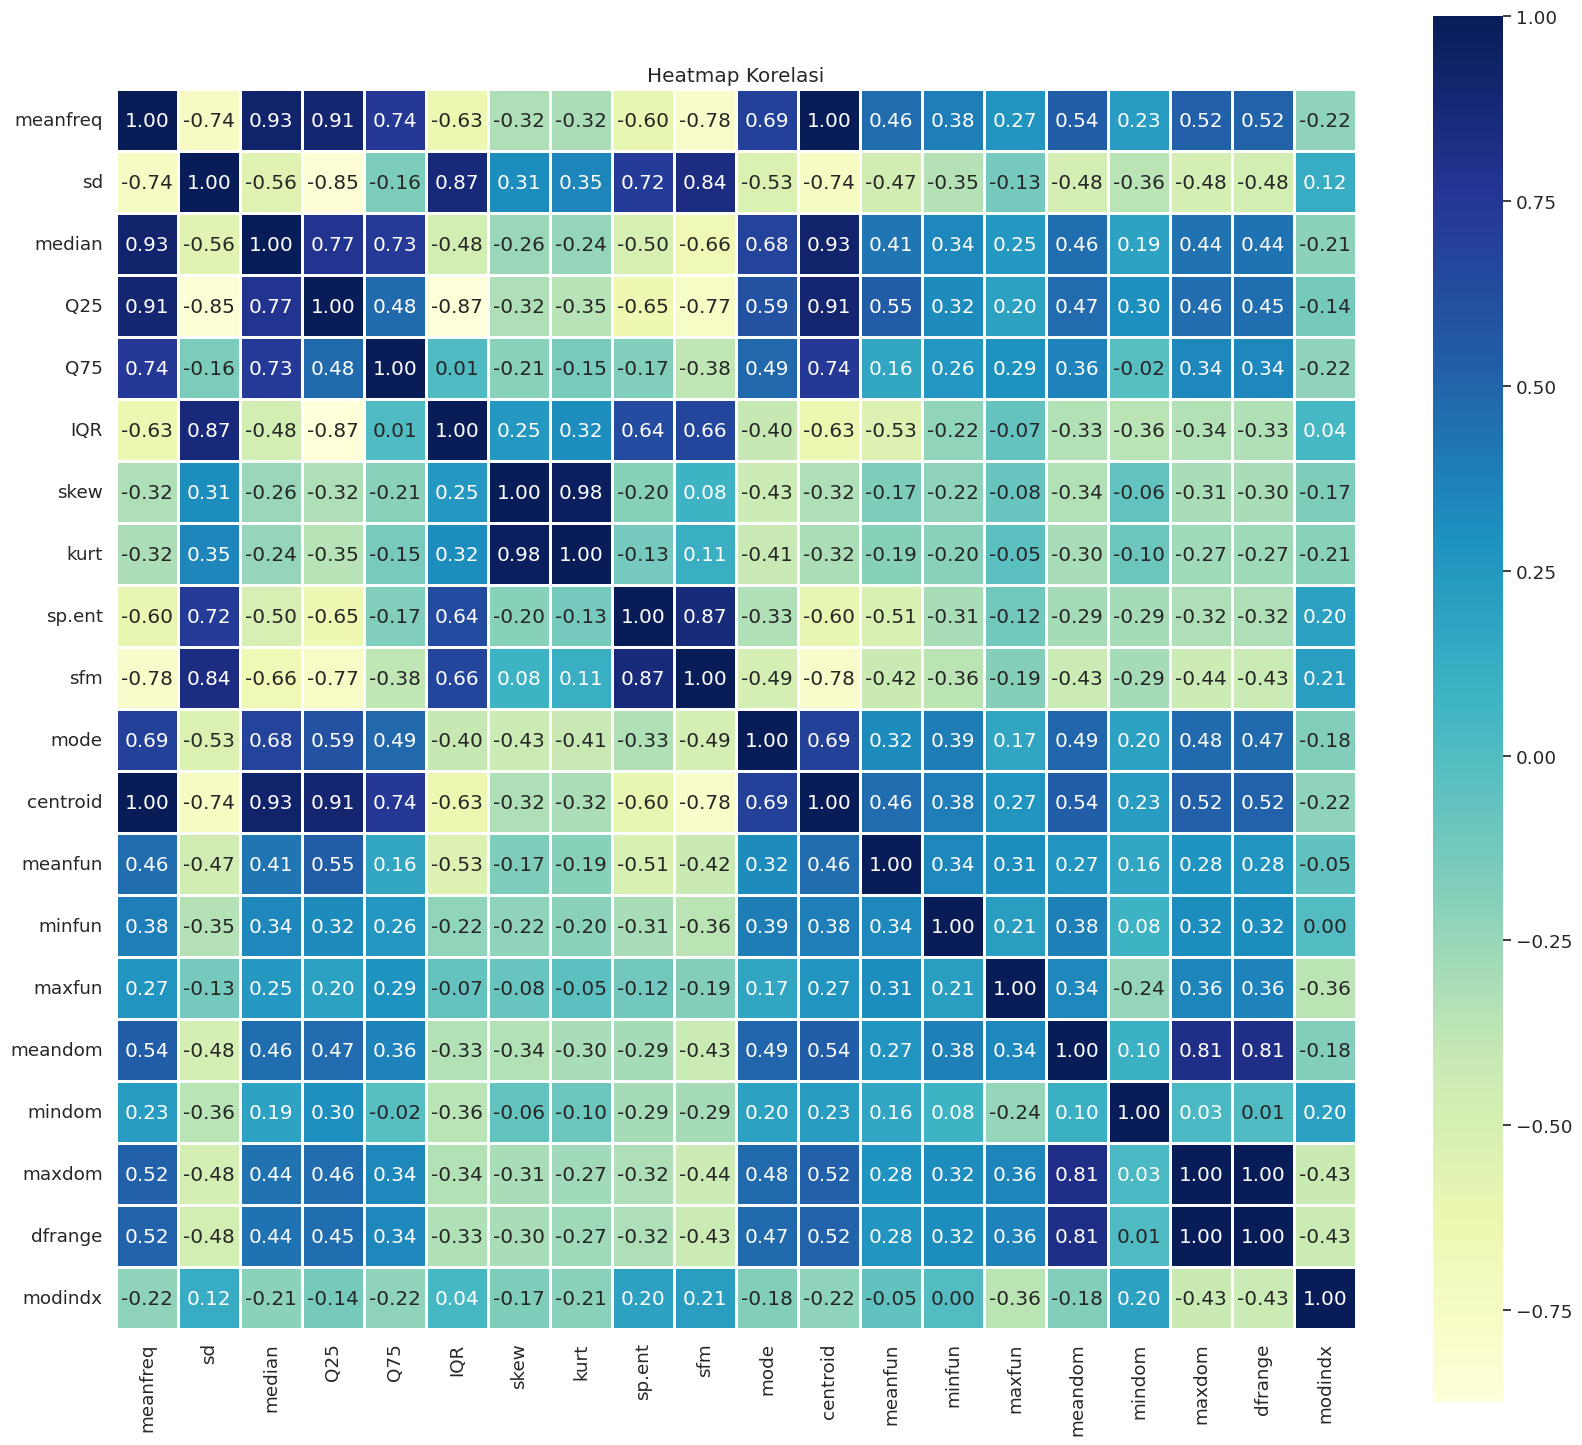

In [599]:
plt.figure(figsize=(20, 18))

# Select only numerical columns for correlation analysis
numerical_data = data.select_dtypes(include=['number'])

corr_matrix = numerical_data.corr()
sns.set(font_scale=1.2)
sns.heatmap(corr_matrix, cmap='YlGnBu', linewidths=1, fmt=".2f", annot=True,cbar=True, square=True)
plt.title('Heatmap Korelasi')
plt.show()

**Penjelasan:**

Kode tersebut digunakan untuk membuat heatmap yang memvisualisasikan matriks korelasi antara kolom-kolom numerik dalam DataFrame data. Heatmap ini membantu dalam memahami hubungan antar variabel dalam dataset.
* **plt.figure(figsize=(20, 18)):** Membuat figure baru dengan ukuran 20x18 inci. Ini untuk memastikan heatmap cukup besar dan mudah dibaca.
* **numerical_data = data.select_dtypes(include=['number']):** Memilih kolom-kolom numerik dari DataFrame data dan menyimpannya dalam variabel numerical_data.
Ini penting karena korelasi hanya dihitung untuk data numerik.
* **corr_matrix = numerical_data.corr():** Menghitung matriks korelasi dari numerical_data. Matriks ini menunjukkan seberapa kuat hubungan linear antara setiap pasangan kolom.
* **sns.set(font_scale=1.2):** Mengatur ukuran font untuk heatmap agar lebih mudah dibaca.
* **sns.heatmap(corr_matrix, cmap='YlGnBu', linewidths=1, fmt=".2f", annot=True, cbar=True, square=True):**
  * Membuat heatmap menggunakan Seaborn.
  * **corr_matrix:** Matriks korelasi yang akan divisualisasikan.
  * **cmap='YlGnBu':** Menggunakan colormap 'YlGnBu' untuk heatmap.
  * **linewidths=1:**Menambahkan garis di antara sel-sel heatmap.
  * **fmt=".2f":** Menampilkan nilai korelasi dengan dua desimal.
  * **annot=True:** Menampilkan nilai korelasi di dalam setiap sel.
  * **cbar=True:** Menampilkan color bar untuk menunjukkan skala korelasi.
  * **square=True:** Membuat sel-sel heatmap berbentuk persegi.
* **plt.title('Heatmap Korelasi'):** Menambahkan judul pada heatmap.
* **plt.show():** Menampilkan heatmap.

  * **Model Klasifikasi SVM**

In [600]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

**Penjelasan:**

Kode tersebut digunakan untuk membuat model Support Vector Machine (SVM), melatihnya dengan data latih, dan kemudian menggunakannya untuk membuat prediksi pada data uji.
* **svm_model = SVC():**
  * Membuat objek model SVM menggunakan class SVC dari library scikit-learn.
  * Karena tidak ada parameter yang ditentukan, model akan menggunakan pengaturan default.
* **svm_model.fit(X_train, y_train):**
  * Melatih model SVM (svm_model) menggunakan data latih (X_train) dan label yang sesuai (y_train).
  * Proses training ini akan mencari hyperplane optimal yang memisahkan data ke dalam kelas yang berbeda.
* **svm_predictions = svm_model.predict(X_test):**
  * Menggunakan model SVM yang telah dilatih (svm_model) untuk memprediksi label dari data uji (X_test).
  * Hasil prediksi disimpan dalam variabel svm_predictions.

  * **Evaluasi Model SVM**

In [601]:
print("Evaluasi Model SVM:")
print(classification_report(y_test, svm_predictions))
print("Akurasi SVM:", accuracy_score(y_test, svm_predictions))

Evaluasi Model SVM:
              precision    recall  f1-score   support

      female       0.65      0.58      0.61       297
        male       0.66      0.73      0.69       337

    accuracy                           0.66       634
   macro avg       0.66      0.65      0.65       634
weighted avg       0.66      0.66      0.65       634

Akurasi SVM: 0.6561514195583596


**Penjelasan:**

Kode tersebut digunakan untuk mengevaluasi performa model SVM yang telah dilatih dengan menampilkan laporan klasifikasi dan skor akurasi.
* **print("Evaluasi Model SVM:"):** Menampilkan teks "Evaluasi Model SVM:".
* **print(classification_report(y_test, svm_predictions)):**
  * Fungsi classification_report dari library sklearn.metrics digunakan untuk membuat laporan klasifikasi.
  * Laporan ini berisi metrik evaluasi seperti precision, recall, F1-score, dan support untuk setiap kelas.
  * y_test adalah label sebenarnya dari data uji, dan svm_predictions adalah label yang diprediksi oleh model SVM.
* **print("Akurasi SVM:", accuracy_score(y_test, svm_predictions)):**
  * Fungsi accuracy_score dari library sklearn.metrics digunakan untuk menghitung akurasi model.
  * Akurasi mengukur persentase prediksi yang benar dari total prediksi.
  * y_test adalah label sebenarnya dari data uji, dan svm_predictions adalah label yang diprediksi oleh model.

**2. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan: Menggunakan data spam.csv, Fitur CountVectorizer dengan mengaktifkan stop_words, Evaluasi hasilnya**
  * **ImporLibrary & Read Data**

In [602]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv("dataset/spam.csv", encoding="latin-1")
df.head()

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

**Penjelasan:**

Kode tersebut mengimpor library yang dibutuhkan untuk membangun model klasifikasi teks dan membaca dataset dari file CSV.
* **Mengimpor library**
  * **import pandas as pd:** Mengimpor library Pandas dan memberinya alias pd. Pandas digunakan untuk manipulasi dan analisis data.
  * **from sklearn.feature_extraction.text import CountVectorizer:** Mengimpor CountVectorizer dari scikit-learn. CountVectorizer digunakan untuk mengubah teks menjadi representasi numerik yang dapat digunakan oleh model machine learning.
  * **from sklearn.model_selection import train_test_split:** Mengimpor train_test_split untuk membagi dataset menjadi data latih dan data uji.
  * **from sklearn.naive_bayes import MultinomialNB:** Mengimpor MultinomialNB yang merupakan implementasi dari algoritma Naive Bayes Multinomial, yang umum digunakan untuk klasifikasi teks.
  * **from sklearn.metrics import accuracy_score, classification_report:** Mengimpor accuracy_score dan classification_report untuk mengevaluasi kinerja model.
* **Membaca dataset**
  * **df = pd.read_csv("dataset/spam.csv", encoding="latin-1"):** Membaca data dari file CSV bernama "spam.csv" yang berada di folder "dataset" dan menyimpannya dalam DataFrame df. encoding="latin-1" digunakan untuk menangani karakter khusus dalam file.
  * **df.head():** Menampilkan lima baris pertama dari DataFrame df untuk melihat sekilas isi dataset.

  * **Analisa Bentuk Data**

In [603]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


**Penjelasan:**

Kode tersebut, data.info(), digunakan untuk menampilkan informasi ringkas tentang DataFrame data yang telah dibaca sebelumnya.
* **Method info()** akan memberikan informasi seperti:
  - Jumlah baris data.
  - Nama kolom dan tipe data dari setiap kolom.
  - Jumlah nilai non-null pada setiap kolom.
  - Penggunaan memori dari DataFrame

  * **Drop Kolom**

In [604]:
df = df.drop(df.columns[2:], axis=1)
df.head()

v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

**Penjelasan:**

Kode tersebut digunakan untuk menghapus kolom-kolom setelah kolom kedua pada DataFrame df dan menampilkan 5 baris pertama dari DataFrame yang telah dimodifikasi.
* **df = df.drop(df.columns[2:], axis=1)**
  * Menghapus kolom-kolom yang tidak dibutuhkan.
  * **df.columns[2:]** memilih semua kolom mulai dari kolom ketiga (indeks 2) hingga kolom terakhir.
  * **axis=1** menunjukkan bahwa operasi dilakukan pada kolom.
* **df.head()**
  * Menampilkan 5 baris pertama dari DataFrame df setelah kolom-kolom dihapus.

Jadi, kode tersebut berguna untuk membersihkan data dengan menghapus kolom yang tidak relevan atau tidak diperlukan untuk analisis atau pemodelan lebih lanjut.

  * **Rename Kolom**

In [605]:
df.rename(columns={'v1': 'Labels', 'v2': 'SMS'}, inplace=True)
df.head()

Labels                                                SMS
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...

**Penjelasan:**

Kode tersebut mengganti nama kolom v1 menjadi Labels dan kolom v2 menjadi SMS pada DataFrame df.
* **df.rename(columns={'v1': 'Labels', 'v2': 'SMS'}, inplace=True)**
  * Method rename digunakan untuk mengubah nama kolom.
  * Parameter columns menerima dictionary dengan key berupa nama kolom lama dan value berupa nama kolom baru.
  * **inplace=True** berarti perubahan nama kolom akan dilakukan langsung pada DataFrame df tanpa perlu membuat DataFrame baru.

  * **Pisahkan Fitur dan Label**

In [606]:
X = df['SMS'].values
y = df['Labels'].values

**Penjelasan:**

Kode tersebut memisahkan fitur (X) dan label (y) dari DataFrame df.
* **X = df['SMS'].values**
  * Mengambil nilai dari kolom SMS dan menyimpannya dalam array NumPy X.
  * Kolom SMS berisi pesan teks yang akan digunakan sebagai fitur dalam model.
  * **.values** digunakan untuk mengambil nilai dari kolom sebagai array NumPy.
* **y = df['Labels'].values**
  * Mengambil nilai dari kolom Labels dan menyimpannya dalam array NumPy y.
  * Kolom Labels berisi label (spam atau ham) yang akan digunakan sebagai target prediksi.
  * **.values** digunakan untuk mengambil nilai dari kolom sebagai array NumPy.

  * **Split Data Training dan Testing**

In [607]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Penjelasan:**

Kode tersebut digunakan untuk membagi data (fitur dan label) menjadi data latih (training) dan data uji (testing).
* **X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)**
  * Fungsi train_test_split dari library sklearn.model_selection digunakan untuk membagi data.
  * X dan y adalah fitur dan label yang telah dipisahkan sebelumnya.
  * **test_size=0.2** berarti 20% data akan digunakan sebagai data uji, dan 80% sebagai data latih.
  * **random_state=42** memastikan bahwa pembagian data akan selalu sama setiap kali kode dijalankan, sehingga hasilnya dapat direproduksi.

  * **Preprocessing Menggunakan CountVectorizer**

In [608]:
cv = CountVectorizer(stop_words='english')
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

print(len(cv.get_feature_names_out()))
print(f'Data: {X_train.shape}')

7472
Data: (4457, 7472)


**Penjelasan:**

Kode tersebut digunakan untuk mengubah teks (SMS) menjadi representasi numerik menggunakan CountVectorizer dan menampilkan informasi tentang fitur yang dihasilkan.
* **cv = CountVectorizer(stop_words='english')**
  * Membuat objek CountVectorizer dengan stop_words='english'. Ini berarti kata-kata umum dalam bahasa Inggris (seperti "the", "a", "is") akan diabaikan.
  * **CountVectorizer** akan menghitung frekuensi kemunculan setiap kata dalam setiap dokumen (SMS) dan membuat matriks yang merepresentasikan data teks.
* **X_train = cv.fit_transform(X_train)**
  * Melakukan "fitting" pada data latih (X_train) menggunakan CountVectorizer (cv).
  * Proses fitting akan mempelajari kosakata dari data latih dan membuat representasi numerik dari data latih.
* **X_test = cv.transform(X_test)** Mengubah data uji (X_test) menjadi representasi numerik menggunakan kosakata yang telah dipelajari dari data latih.
* **print(len(cv.get_feature_names_out()))** Menampilkan jumlah fitur (kata unik) yang dihasilkan oleh CountVectorizer.
* **print(f'Data: {X_train.shape}')** Menampilkan dimensi data latih setelah diubah menjadi representasi numerik.

  * **Buat dan Latih Model Multinomial Naive Bayes**

In [609]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

**Penjelasan:**

Kode tersebut digunakan untuk membuat dan melatih model Naive Bayes Multinomial untuk klasifikasi teks.
* **model = MultinomialNB():**
  * Membuat objek model Naive Bayes Multinomial menggunakan class MultinomialNB dari scikit-learn.
  * Model ini cocok untuk data dengan fitur-fitur yang merepresentasikan frekuensi (counts), seperti yang dihasilkan oleh CountVectorizer.
* **model.fit(X_train, y_train):**
  * Melatih model Naive Bayes (model) menggunakan data latih (X_train) yang telah diubah menjadi representasi numerik dan label yang sesuai (y_train).
  * Selama proses training, model akan menghitung probabilitas kemunculan kata-kata dalam setiap kelas (spam atau ham).

  * **Evaluasi**

In [610]:
# Prediksi dengan data training
y_pred_train = model.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data testing
y_pred_test = model.predict(X_test)

# Evaluasi akurasi data testing
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Data train: {acc_train}')
print(f'Data test: {acc_test}')

# Laporan klasifikasi
print(classification_report(y_test, y_pred_test))

Data train: 0.9946152120260264
Data test: 0.9838565022421525
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       965
        spam       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



**Penjelasan:**

Kode tersebut digunakan untuk mengevaluasi performa model Naive Bayes yang telah dilatih pada data latih dan data uji.
* **y_pred_train = model.predict(X_train):** Memprediksi label untuk data latih (X_train) menggunakan model yang telah dilatih dan menyimpannya di y_pred_train.
* **acc_train = accuracy_score(y_train, y_pred_train):** Menghitung akurasi model pada data latih dengan membandingkan label prediksi (y_pred_train) dengan label sebenarnya (y_train).
* **y_pred_test = model.predict(X_test):** Memprediksi label untuk data uji (X_test) menggunakan model yang telah dilatih dan menyimpannya di y_pred_test.
* **acc_test = accuracy_score(y_test, y_pred_test):** Menghitung akurasi model pada data uji dengan membandingkan label prediksi (y_pred_test) dengan label sebenarnya (y_test).
* **print(f'Data train: {acc_train}'):** Menampilkan akurasi model pada data latih.
* **print(f'Data test: {acc_test}'):** Menampilkan akurasi model pada data uji.
* **print(classification_report(y_test, y_pred_test)):** Menampilkan laporan klasifikasi yang berisi metrik evaluasi seperti precision, recall, dan F1-score untuk setiap kelas (spam dan ham) pada data uji.

Jadi, kode tersebut penting untuk mengukur seberapa baik model dalam mengklasifikasikan pesan teks sebagai spam atau ham. Akurasi pada data latih dan data uji memberikan gambaran tentang kemampuan model untuk menggeneralisasi pada data baru. Laporan klasifikasi memberikan informasi lebih detail tentang performa model untuk setiap kelas.

**3. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan: Menggunakan data spam.csv, Fitur TF-IDF dengan mengaktifkan stop_words, Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2, Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv**

  * **Impor Library & Read Data**

In [611]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv("dataset/spam.csv", encoding="latin-1")
df.head()

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

**Penjelasan:**

Kode tersebut mengimpor library yang dibutuhkan untuk membangun model klasifikasi teks, membaca dataset dari file CSV, dan melakukan sedikit preprocessing data.
* **Mengimpor library**
  * **import pandas as pd:** Mengimpor library Pandas dan memberinya alias pd. Pandas digunakan untuk manipulasi dan analisis data, khususnya dalam bentuk DataFrame.
  * **from sklearn.feature_extraction.text import TfidfVectorizer:** Mengimpor TfidfVectorizer dari scikit-learn. TfidfVectorizer digunakan untuk mengubah teks menjadi representasi numerik (TF-IDF) yang dapat digunakan oleh model machine learning.
  * **from sklearn.model_selection import train_test_split:** Mengimpor train_test_split untuk membagi dataset menjadi data latih dan data uji.
  * **from sklearn.naive_bayes import MultinomialNB:** Mengimpor MultinomialNB yang merupakan implementasi dari algoritma Naive Bayes, yang umum digunakan untuk klasifikasi teks.
  * **from sklearn.metrics import accuracy_score, classification_report:** Mengimpor accuracy_score dan classification_report untuk mengevaluasi kinerja model.

* **Membaca dataset**
  * df = pd.read_csv("dataset/spam.csv", encoding="latin-1"): Membaca data dari file CSV bernama "spam.csv" yang berada di folder "dataset" dan menyimpannya dalam DataFrame df. encoding="latin-1" digunakan untuk menangani karakter khusus dalam file.
  * **df.head():** Menampilkan lima baris pertama dari DataFrame df untuk melihat sekilas isi dataset setelah kolom dihapus.

  * **Drop Kolom**

In [612]:
df = df.drop(df.columns[2:], axis=1)
df.head()

v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

**Penjelasan:**

Kode tersebut digunakan untuk menghapus kolom-kolom setelah kolom kedua pada DataFrame df dan menampilkan 5 baris pertama dari DataFrame yang telah dimodifikasi.
* **df = df.drop(df.columns[2:], axis=1)**
  * Menghapus kolom-kolom yang tidak dibutuhkan.
  * **df.columns[2:]** memilih semua kolom mulai dari kolom ketiga (indeks 2) hingga kolom terakhir.
  * **axis=1** menunjukkan bahwa operasi dilakukan pada kolom.
* **df.head()**
  * Menampilkan 5 baris pertama dari DataFrame df setelah kolom-kolom dihapus.

Jadi, kode tersebut berguna untuk membersihkan data dengan menghapus kolom yang tidak relevan atau tidak diperlukan untuk analisis atau pemodelan lebih lanjut.

  * **Rename Kolom**

In [613]:
df.rename(columns={'v1': 'Labels', 'v2': 'SMS'}, inplace=True)
df.head()

Labels                                                SMS
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...

**Penjelasan:**

Kode tersebut mengganti nama kolom v1 menjadi Labels dan kolom v2 menjadi SMS pada DataFrame df.
* **df.rename(columns={'v1': 'Labels', 'v2': 'SMS'}, inplace=True)**
  * Method rename digunakan untuk mengubah nama kolom.
  * Parameter columns menerima dictionary dengan key berupa nama kolom lama dan value berupa nama kolom baru.
  * **inplace=True** berarti perubahan nama kolom akan dilakukan langsung pada DataFrame df tanpa perlu membuat DataFrame baru.

  * **Pisahkan  Fitur dan Label**

In [614]:
X = df['SMS'].values
y = df['Labels'].values

**Penjelasan:**

Kode tersebut memisahkan fitur (X) dan label (y) dari DataFrame df.
* **X = df['SMS'].values**
  * Mengambil nilai dari kolom SMS dan menyimpannya dalam array NumPy X.
  * Kolom SMS berisi pesan teks yang akan digunakan sebagai fitur dalam model.
  * **.values** digunakan untuk mengambil nilai dari kolom sebagai array NumPy.
* **y = df['Labels'].values**
  * Mengambil nilai dari kolom Labels dan menyimpannya dalam array NumPy y.
  * Kolom Labels berisi label (spam atau ham) yang akan digunakan sebagai target prediksi.
  * **.values** digunakan untuk mengambil nilai dari kolom sebagai array NumPy.

  * **Buat Model TF-IDF**

In [615]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(X)

**Penjelasan:**

Kode tersebut digunakan untuk mengubah teks menjadi representasi numerik menggunakan metode TF-IDF (Term Frequency-Inverse Document Frequency) dengan TfidfVectorizer.
* **tfidf_vectorizer = TfidfVectorizer(stop_words='english')**
  * Membuat objek TfidfVectorizer dengan stop_words='english'. Ini berarti kata-kata umum dalam bahasa Inggris (seperti "the", "a", "is") akan diabaikan.
  * **TfidfVectorizer** akan menghitung nilai TF-IDF untuk setiap kata dalam setiap dokumen. Nilai TF-IDF menunjukkan seberapa penting suatu kata dalam suatu dokumen relatif terhadap seluruh koleksi dokumen.
* **X_tfidf = tfidf_vectorizer.fit_transform(X)**
  * Melakukan "fitting" pada data (X) menggunakan TfidfVectorizer (tfidf_vectorizer).
  * Proses fitting akan mempelajari kosakata (kata-kata unik) dari data dan menghitung nilai IDF (Inverse Document Frequency) untuk setiap kata.
  * Kemudian, data X diubah menjadi representasi numerik TF-IDF dan disimpan dalam variabel X_tfidf.

  * **Split Data Training dan Testing**

In [616]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(len(tfidf_vectorizer.get_feature_names_out()))
print(f'Data: {X_train_tfidf.shape}')

8404
Data: (4457, 8404)


**Penjelasan:**

Kode tersebut membagi data menjadi data latih dan data uji, lalu menampilkan informasi tentang fitur yang dihasilkan oleh TfidfVectorizer.
* **X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42):**
  * Fungsi train_test_split dari scikit-learn digunakan untuk membagi data fitur (X) dan label (y) menjadi data latih dan data uji.
  * **test_size=0.2** berarti 20% data akan digunakan sebagai data uji, dan 80% sebagai data latih.
  * **random_state=42** digunakan untuk memastikan bahwa pembagian data akan selalu sama setiap kali kode dijalankan.
* **print(len(tfidf_vectorizer.get_feature_names_out())):** Menampilkan jumlah fitur (kata unik) yang dihasilkan oleh TfidfVectorizer.
* **print(f'Data: {X_train_tfidf.shape}'):**
  * **Variabel X_train_tfidf** tidak didefinisikan di kode yang Anda berikan. Seharusnya variabel ini merupakan hasil transformasi data latih X_train menggunakan tfidf_vectorizer.
  * Jika X_train_tfidf sudah didefinisikan dengan benar, kode ini akan menampilkan dimensi data latih setelah diubah menjadi representasi numerik TF-IDF.

  * **Evaluasi**

In [617]:
# Buat model klasifikasi Multinomial Naive Bayes dengan TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Bagi data menjadi data latih dan data uji
X_train_tfidf, X_test_tfidf, y_train_spam, y_test_spam = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

nb_tfidf_model = MultinomialNB()
nb_tfidf_model.fit(X_train_tfidf, y_train_spam)
nb_tfidf_predictions = nb_tfidf_model.predict(X_test_tfidf)

# Evaluasi model Multinomial Naive Bayes dengan TF-IDF
from sklearn.metrics import classification_report, accuracy_score

print("\nEvaluasi Model Multinomial Naive Bayes dengan TF-IDF:")
print(classification_report(y_test_spam, nb_tfidf_predictions))
print("Akurasi Multinomial Naive Bayes dengan TF-IDF:", accuracy_score(y_test_spam, nb_tfidf_predictions))

# Buat model klasifikasi Multinomial Naive Bayes dengan CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english')
X_count = count_vectorizer.fit_transform(X)

# Bagi data menjadi data latih dan data uji
X_train_count, X_test_count, y_train_spam, y_test_spam = train_test_split(X_count, y, test_size=0.2, random_state=42)

nb_count_model = MultinomialNB()
nb_count_model.fit(X_train_count, y_train_spam)
nb_count_predictions = nb_count_model.predict(X_test_count)

# Evaluasi model Multinomial Naive Bayes dengan CountVectorizer
print("\nEvaluasi Model Multinomial Naive Bayes dengan CountVectorizer:")
print(classification_report(y_test_spam, nb_count_predictions))
print("Akurasi Multinomial Naive Bayes dengan CountVectorizer:", accuracy_score(y_test_spam, nb_count_predictions))


Evaluasi Model Multinomial Naive Bayes dengan TF-IDF:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.93      1115
weighted avg       0.97      0.97      0.97      1115

Akurasi Multinomial Naive Bayes dengan TF-IDF: 0.968609865470852

Evaluasi Model Multinomial Naive Bayes dengan CountVectorizer:
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       965
        spam       0.93      0.93      0.93       150

    accuracy                           0.98      1115
   macro avg       0.96      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Akurasi Multinomial Naive Bayes dengan CountVectorizer: 0.9802690582959641


**Penjelasan:**

Kode program tersebut digunakan untuk membandingkan kinerja dua metode vektorisasi teks, yaitu TF-IDF dan CountVectorizer, dalam model klasifikasi Multinomial Naive Bayes untuk mendeteksi email spam.
* **tfidf_vectorizer = TfidfVectorizer(stop_words='english')**
  * Membuat objek TfidfVectorizer dengan stop_words='english'. Ini berarti kata-kata umum dalam bahasa Inggris (seperti "the", "a", "is") akan diabaikan.
  * **TfidfVectorizer** akan menghitung nilai TF-IDF untuk setiap kata dalam setiap dokumen. Nilai TF-IDF menunjukkan seberapa penting suatu kata dalam suatu dokumen relatif terhadap seluruh koleksi dokumen.
* **X_tfidf = tfidf_vectorizer.fit_transform(X)**
  * Melakukan "fitting" pada data (X) menggunakan TfidfVectorizer (tfidf_vectorizer).
  * Proses fitting akan mempelajari kosakata (kata-kata unik) dari data dan menghitung nilai IDF (Inverse Document Frequency) untuk setiap kata.
  * Kemudian, data X diubah menjadi representasi numerik TF-IDF dan disimpan dalam variabel X_tfidf.
* **X_train_tfidf, X_test_tfidf, y_train_spam, y_test_spam = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)**
  * Membagi data fitur TF-IDF (X_tfidf) dan label (y) menjadi data latih (X_train_tfidf, y_train_spam) dan data uji (X_test_tfidf, y_test_spam).
  * **test_size=0.2** menunjukkan bahwa 20% data akan digunakan sebagai data uji.
  * **random_state=42** menjamin bahwa pembagian data akan selalu sama.
* **nb_tfidf_model = MultinomialNB():** Membuat objek model Naive Bayes Multinomial.
* **nb_tfidf_model.fit(X_train_tfidf, y_train_spam):** Melatih model Naive Bayes menggunakan data latih (X_train_tfidf dan y_train_spam).
* **nb_tfidf_predictions = nb_tfidf_model.predict(X_test_tfidf):** Menggunakan model yang sudah dilatih untuk memprediksi label pada data uji (X_test_tfidf) dan menyimpan hasil prediksi di nb_tfidf_predictions.
* **from sklearn.metrics import classification_report, accuracy_score:** Mengimpor fungsi classification_report dan accuracy_score dari scikit-learn untuk mengevaluasi model.
* **print("\nEvaluasi Model Multinomial Naive Bayes dengan TF-IDF:"):** Menampilkan teks untuk judul evaluasi.
* **print(classification_report(y_test_spam, nb_tfidf_predictions)):**
  * Menampilkan laporan klasifikasi.
  * Laporan ini berisi metrik seperti precision, recall, F1-score, dan support untuk setiap kelas (spam dan ham) pada data uji.
  * **y_test_spam:** label sebenarnya dari data uji.
  * **nb_tfidf_predictions:** label yang diprediksi oleh model.
* **print("Akurasi Multinomial Naive Bayes dengan TF-IDF:", accuracy_score(y_test_spam, nb_tfidf_predictions)):**
  * Menampilkan skor akurasi model.
  * Akurasi mengukur persentase prediksi yang benar dari total prediksi.
* **count_vectorizer = CountVectorizer(stop_words='english'):**
  * Membuat objek CountVectorizer dengan stop_words='english'. Ini berarti kata-kata umum dalam bahasa Inggris (seperti "the", "a", "is") akan diabaikan.
  * **CountVectorizer** akan menghitung frekuensi kemunculan setiap kata dalam setiap dokumen (SMS) dan membuat matriks yang merepresentasikan data teks.
* **X_count = count_vectorizer.fit_transform(X):**
  * Melakukan fitting pada data (X) menggunakan CountVectorizer. Proses ini akan mempelajari kosakata (kata-kata unik) dari data.
  * Kemudian, data X diubah menjadi representasi numerik berdasarkan frekuensi kata dan disimpan dalam variabel X_count.
* **nb_count_model.fit(X_train_count, y_train_spam):** Melatih model Naive Bayes menggunakan data latih yang direpresentasikan dengan CountVectorizer (X_train_count dan y_train_spam).
* **nb_count_predictions = nb_count_model.predict(X_test_count):**
Menggunakan model yang sudah dilatih untuk memprediksi label pada data uji (X_test_count) dan menyimpan hasilnya di nb_count_predictions.
* **print("\nEvaluasi Model Multinomial Naive Bayes dengan CountVectorizer:"):** Menampilkan teks untuk judul evaluasi.
* **print(classification_report(y_test_spam, nb_count_predictions)):**
  * Menampilkan laporan klasifikasi. Laporan ini berisi metrik seperti precision, recall, F1-score, dan support untuk setiap kelas (spam dan ham) pada data uji.
  * **y_test_spam:** label sebenarnya dari data uji.
  * **nb_count_predictions:** label yang diprediksi oleh model.
* **print("Akurasi Multinomial Naive Bayes dengan CountVectorizer:", accuracy_score(y_test_spam, nb_count_predictions)):** Menampilkan skor akurasi model. Akurasi mengukur persentase prediksi yang benar dari total prediksi.

* **Perbandingan**

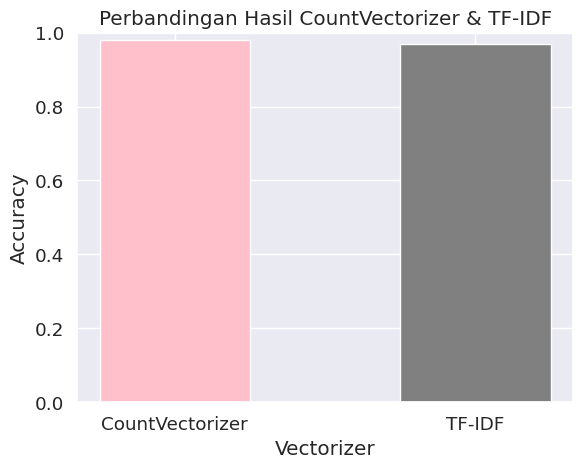

In [618]:
# Calculate and store the accuracies
count_accuracy = accuracy_score(y_test_spam, nb_count_predictions) # Calculate and assign to count_accuracy
tfidf_accuracy = accuracy_score(y_test_spam, nb_tfidf_predictions) # Calculate and assign to tfidf_accuracy

# Plot perbandingan hasil
!pip install matplotlib
import matplotlib.pyplot as plt #Import the matplotlib library
plt.bar(['CountVectorizer', 'TF-IDF'], [count_accuracy, tfidf_accuracy], color=['pink', 'grey'], width=0.5)
plt.title('Perbandingan Hasil CountVectorizer & TF-IDF')
plt.xlabel('Vectorizer')
plt.ylabel('Accuracy')
plt.ylim(0, 1) # Set y-axis limit to show accuracy properly
plt.show()

**Penjelasan:**

Kode tersebut digunakan untuk menghitung akurasi model Multinomial Naive Bayes yang telah dilatih menggunakan dua metode vektorisasi teks yang berbeda, yaitu CountVectorizer dan TF-IDF, kemudian memvisualisasikan hasil akurasinya menggunakan diagram batang.
* **count_accuracy = accuracy_score(y_test_spam, nb_count_predictions):** Menghitung akurasi model Naive Bayes yang dilatih dengan CountVectorizer dan menyimpannya dalam variabel count_accuracy.
* **tfidf_accuracy = accuracy_score(y_test_spam, nb_tfidf_predictions):** Menghitung akurasi model Naive Bayes yang dilatih dengan TF-IDF dan menyimpannya dalam variabel tfidf_accuracy.
* **!pip install matplotlib:** Menginstal library matplotlib jika belum terinstal. matplotlib digunakan untuk membuat visualisasi data seperti plot dan grafik.
* **import matplotlib.pyplot as plt:** Mengimpor modul pyplot dari matplotlib dan memberinya alias plt.
* **plt.bar(['CountVectorizer', 'TF-IDF'], [count_accuracy, tfidf_accuracy], color=['pink', 'grey'], width=0.5):**
  * Membuat bar plot.
  * **['CountVectorizer', 'TF-IDF']:** Label untuk setiap bar (sumbu x).
  * **[count_accuracy, tfidf_accuracy]:** Tinggi setiap bar (sumbu y), yaitu nilai akurasi yang telah dihitung sebelumnya.
  * **color=['pink', 'grey']:** Warna untuk setiap bar.
  * **width=0.5:** Lebar setiap bar.
* **plt.title('Perbandingan Hasil CountVectorizer & TF-IDF'):** Menambahkan judul pada plot.
* **plt.xlabel('Vectorizer'):** Menambahkan label pada sumbu x.
* **plt.ylabel('Accuracy'):** Menambahkan label pada sumbu y.
* **plt.ylim(0, 1):** Mengatur batas sumbu y dari 0 hingga 1. Ini berguna untuk menampilkan akurasi dengan benar, karena nilai akurasi berkisar antara 0 dan 1.
* **plt.show():** Menampilkan bar plot.

* **Kesimpulan**

  Berdasarkan hasil tersebut, akurasi penggunaan
    - CountVectorizer adalah 0.9802690582959641
    - TF-IDF memiliki akurasi 0.968609865470852
  
  Meskipun perbedaannya kecil, hasil ini menunjukkan bahwa CountVectorizer memberikan sedikit keunggulan dalam akurasi dibandingkan dengan TF-IDF. Oleh karena itu, dalam pembuatan model klasifikasi Multinomial Naive Bayes pada dataset ini, lebih baik menggunakan CountVectorizer untuk hasil yang lebih optimal.

# **Tugas 2**
Buatlah model klasifikasi dengan menggunakan SVM berdasarkan data pada Percobaan 5 dengan menggunakan **fitur histogram**.

# **Jawaban Tugas 2:**

  * **Import Library**

In [619]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

**Penjelasan:**

Kode tersebut mengimpor library-library yang umum digunakan untuk memproses gambar dan data dalam Python.
* **from pathlib import Path:** Mengimpor modul Path dari library pathlib untuk bekerja dengan file dan direktori dengan cara yang lebih objek-oriented.
* **import matplotlib.image as mpimg:** Mengimpor modul image dari library matplotlib dan memberinya alias mpimg untuk membaca dan menampilkan gambar.
* **import matplotlib.pyplot as plt:** Mengimpor modul pyplot dari library matplotlib dan memberinya alias plt untuk membuat plot dan visualisasi data.
* **import cv2:** Mengimpor library OpenCV (cv2) yang digunakan untuk pemrosesan gambar dan video.
* **import random:** Mengimpor modul random untuk menghasilkan angka acak.
* **import numpy as np:** Mengimpor library NumPy dan memberinya alias np untuk komputasi numerik, terutama untuk bekerja dengan array multidimensi.
* **import pandas as pd:** Mengimpor library Pandas dan memberinya alias pd untuk manipulasi dan analisis data, khususnya dalam bentuk DataFrame.

  * **Load Images**

In [620]:
# Image directories
train_dir = "images/training/"
test_dir = "images/test/"

**Penjelasan:**

Kode tersebut mendefinisikan variabel train_dir dan test_dir yang menyimpan path ke direktori gambar untuk training dan testing.
* **train_dir = "images/training/":** Path ke direktori yang berisi gambar untuk training.
* **test_dir = "images/test/":** Path ke direktori yang berisi gambar untuk testing.

  * **Buat Daftar Path**

In [621]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

**Penjelasan:**

Kode tersebut mendefinisikan fungsi load_dataset yang digunakan untuk membaca gambar dari direktori dan mengembalikan daftar gambar beserta labelnya.
* **def load_dataset(img_dir)::** Mendefinisikan fungsi load_dataset yang menerima satu argumen, yaitu img_dir, yang merupakan path ke direktori gambar.
* **p = Path(img_dir):** Membuat objek Path dari img_dir untuk memudahkan navigasi direktori.
* **dirs = p.glob('*'):** Mencari semua subdirektori di dalam img_dir.
* **img_list = []:** Membuat list kosong untuk menyimpan gambar dan labelnya.
* **for dir in dirs::** Melakukan iterasi untuk setiap subdirektori.
  * **label = str(dir).split('/')[-1]:** Mengambil nama subdirektori sebagai label.
  * **for file in dir.glob('*.jpg')::** Melakukan iterasi untuk setiap file JPG di dalam subdirektori.
    - img = mpimg.imread(file): Membaca gambar menggunakan mpimg.imread.
    - if not img is None:: Memeriksa apakah gambar berhasil dibaca.
      - img_list.append((img, label)): Menambahkan gambar dan labelnya ke img_list.
* **return img_list:** Mengembalikan list yang berisi tuple (gambar, label).

  * **Load Data Training dan Data Test**

In [622]:
train_img = load_dataset(train_dir)
test_img = load_dataset(test_dir)

**Penjelasan:**

Kode tersebut memanggil fungsi load_dataset untuk membaca gambar dan label dari direktori training dan testing, lalu menyimpannya dalam variabel train_img dan test_img.
* **train_img = load_dataset(train_dir):** Memanggil fungsi load_dataset dengan train_dir sebagai argumen dan menyimpan hasilnya (list gambar dan label dari direktori training) dalam variabel train_img.
* **test_img = load_dataset(test_dir):** Memanggil fungsi load_dataset dengan test_dir sebagai argumen dan menyimpan hasilnya (list gambar dan label dari direktori testing) dalam variabel test_img.

  * **Cek List**

In [623]:
train_img[0]

(array([[[189, 196, 206],
         [161, 168, 178],
         [163, 170, 180],
         ...,
         [172, 187, 194],
         [172, 187, 194],
         [172, 187, 194]],
 
        [[188, 195, 205],
         [161, 168, 178],
         [163, 170, 180],
         ...,
         [172, 187, 194],
         [172, 187, 194],
         [172, 187, 194]],
 
        [[187, 194, 204],
         [160, 167, 177],
         [164, 171, 181],
         ...,
         [172, 187, 194],
         [172, 187, 194],
         [172, 187, 194]],
 
        ...,
 
        [[ 46,  42,  39],
         [ 31,  27,  24],
         [ 29,  25,  22],
         ...,
         [ 37,  29,  26],
         [ 37,  32,  28],
         [ 39,  34,  30]],
 
        [[ 50,  46,  43],
         [ 34,  30,  27],
         [ 30,  26,  23],
         ...,
         [ 35,  27,  24],
         [ 35,  30,  26],
         [ 36,  31,  27]],
 
        [[ 52,  48,  45],
         [ 36,  32,  29],
         [ 31,  27,  24],
         ...,
         [ 32,  24,  21],
  

**Penjelasan:**

Kode tersebut akan menampilkan elemen pertama dari list train_img.
Elemen pertama ini merupakan sebuah tuple yang berisi dua elemen:
  * Gambar yang direpresentasikan sebagai array NumPy.
  * Label dari gambar tersebut (nama subdirektori tempat gambar tersebut berada).

  * **Cek Random Ukuran Data**

In [624]:
pick_random = np.random.randint(0, len(train_img))

print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 69
(889, 1280, 3)


**Penjelasan:**

Kode tersebut memilih gambar secara acak dari train_img dan menampilkan informasi tentang gambar tersebut.
* **pick_random = np.random.randint(0, len(train_img)):**
  * Menghasilkan angka acak antara 0 dan panjang list train_img (tidak termasuk panjang list).
  * Angka acak ini akan digunakan sebagai indeks untuk memilih gambar secara acak.
* **print(f'Image {pick_random}'):** Menampilkan teks "Image" diikuti oleh angka acak yang dihasilkan.
* **print(train_img[pick_random][0].shape):**
  * Menampilkan dimensi (shape) dari gambar yang dipilih secara acak.
  * **train_img[pick_random]** mengakses tuple (gambar, label) pada indeks pick_random.
  * **[0]** mengambil elemen pertama dari tuple, yaitu gambar.
  * **.shape** menampilkan dimensi gambar (tinggi, lebar, dan jumlah channel warna).

  * **Tampilkan Gambar**

In [625]:
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    plt.grid(False)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')
    plt.show()

**Penjelasan:**

Kode tersebut mendefinisikan fungsi random_img_viz untuk menampilkan gambar secara acak dari suatu list dan menampilkan informasi tentang gambar tersebut, termasuk shape dan label.
* **def random_img_viz(img_list)::** Mendefinisikan fungsi random_img_viz yang menerima satu argumen, yaitu img_list, yang merupakan list berisi tuple (gambar, label).
* **rand_num = np.random.randint(0, len(img_list)):** Menghasilkan angka acak untuk memilih gambar dari img_list.
* **img = img_list[rand_num][0]:** Mengambil gambar dari tuple yang dipilih secara acak.
* **label = img_list[rand_num][1]:** Mengambil label dari tuple yang dipilih secara acak.
* **label_str = 'day' if label == 1 else 'night':** Mengubah label numerik (1 atau 0) menjadi string "day" atau "night".
* **plt.imshow(img):** Menampilkan gambar menggunakan Matplotlib.
* **plt.grid(False):** Menonaktifkan grid pada plot.
* **print(f'Shape\t: {img.shape}'):** Menampilkan dimensi gambar.
* **print(f'Label\t: {label}'):** Menampilkan label gambar.
* **plt.show():** Menampilkan plot.

  * **Tampilkan Acak**

Shape	: (555, 800, 3)
Label	: day


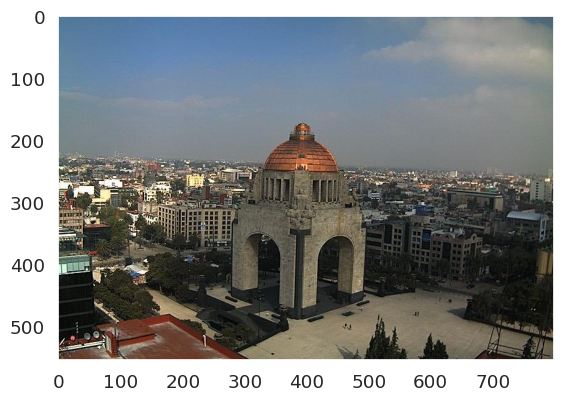

In [626]:
random_img_viz(train_img)

**Penjelasan:**

Kode tersebut akan memanggil fungsi random_img_viz dengan train_img sebagai argumen.

Fungsi ini akan:
  * Memilih satu gambar secara acak dari list train_img.
  * Menampilkan gambar tersebut menggunakan Matplotlib.
  * Menampilkan informasi tentang gambar tersebut, termasuk dimensi (shape) dan label ("day" atau "night").

  * **Standarkan Ukuran Data**

In [627]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

**Penjelasan:**

Kode tersebut mendefinisikan fungsi standarized_input yang digunakan untuk mengubah ukuran gambar menjadi 1100x600 piksel.
* **def standarized_input(image)::** Mendefinisikan fungsi standarized_input yang menerima satu argumen, yaitu image, yang merupakan gambar yang akan diubah ukurannya.
* **std_img = cv2.resize(image, (1100,600)):**
  * Menggunakan fungsi resize dari OpenCV (cv2) untuk mengubah ukuran gambar.
  * **image:** Gambar input.
  * **(1100, 600):** Ukuran baru gambar (lebar: 1100 piksel, tinggi: 600 piksel).
  * Hasil resize disimpan dalam variabel std_img.
* **return std_img:** Mengembalikan gambar yang telah diubah ukurannya.

  * **Encode**

In [628]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

**Penjelasan:**

Kode tersebut mendefinisikan fungsi label_encoder untuk mengubah label kategorikal ("day" atau "night") menjadi label numerik (1 atau 0).
* **def label_encoder(label)::** Mendefinisikan fungsi label_encoder yang menerima satu argumen, yaitu label yang merupakan string ("day" atau "night").
* **num_val = 0:** Inisialisasi variabel num_val dengan nilai 0. Nilai ini akan dikembalikan jika label bukan "day".
* **if(label == 'day')::** Memeriksa apakah label sama dengan "day".
  * **num_val = 1:** Jika label adalah "day", maka num_val diubah menjadi 1.
* **return num_val:** Mengembalikan nilai num_val yang merupakan representasi numerik dari label.

  * **Standarkan Ukuran & Encode**

In [629]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

**Penjelasan:**

Kode tersebut mendefinisikan fungsi preprocess yang digunakan untuk melakukan preprocessing pada list gambar dan label. Preprocessing yang dilakukan meliputi standarisasi ukuran gambar dan encoding label.
* **def preprocess(img_list)::** Mendefinisikan fungsi preprocess yang menerima satu argumen, yaitu img_list, yang merupakan list berisi tuple (gambar, label).
* **std_img_list = []:** Membuat list kosong untuk menyimpan gambar dan label yang telah dipreprocessing.
* **for item in img_list::** Melakukan iterasi untuk setiap tuple (gambar, label) dalam img_list.
  * **image = item[0]:** Mengambil gambar dari tuple.
  * **label = item[1]:** Mengambil label dari tuple.
  * **std_img = standarized_input(image):** Memanggil fungsi standarized_input untuk menstandarisasi ukuran gambar.
  * **img_label = label_encoder(label):** Memanggil fungsi label_encoder untuk mengubah label kategorikal menjadi numerik.
  * **std_img_list.append((std_img, img_label)):** Menambahkan gambar dan label yang telah dipreprocessing ke std_img_list.
* **return std_img_list:** Mengembalikan list yang berisi tuple (gambar, label) yang telah dipreprocessing.

Jadi, fungsi ini menggabungkan fungsi standarized_input dan label_encoder untuk melakukan preprocessing pada data gambar dan label.

  * **Praprocessing Data Training & Data Test**

In [630]:
train_std_img_list = preprocess(train_img)
test_std_img_list = preprocess(test_img)

**Penjelasan:**

Kode tersebut memanggil fungsi preprocess untuk melakukan preprocessing pada data training dan testing.
* **train_std_img_list = preprocess(train_img):**
  * Memanggil fungsi preprocess dengan train_img sebagai argumen.
  * Fungsi preprocess akan menstandarisasi ukuran gambar dan melakukan encoding label pada data training.
  * Hasil preprocessing data training disimpan dalam variabel train_std_img_list.
* **test_std_img_list = preprocess(test_img):**
  * Memanggil fungsi preprocess dengan test_img sebagai argumen.
  * Fungsi preprocess akan menstandarisasi ukuran gambar dan melakukan encoding label pada data testing.
  * Hasil preprocessing data testing disimpan dalam variabel test_std_img_list.

  * **Cek Random Ukuran Data**

In [631]:
pick_random = np.random.randint(0, len(train_std_img_list))

print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 167
(600, 1100, 3)


**Penjelasan:**

Kode tersebut bertujuan untuk memilih secara acak satu gambar dari daftar gambar train_std_img_list, kemudian menampilkan indeks gambar tersebut dan bentuk (dimensi) dari gambar yang dipilih.
* **pick_random = np.random.randint(0, len(train_std_img_list)):** Memilih sebuah angka acak dari 0 hingga jumlah gambar di dalam train_std_img_list (tidak termasuk jumlah gambar itu sendiri). Angka acak ini akan digunakan sebagai indeks untuk memilih gambar.
* **print(f'Image {pick_random}'):** Menampilkan teks "Image" diikuti dengan angka yang dipilih secara acak.
* **print(train_std_img_list[pick_random][0].shape):**
  * Menampilkan dimensi (shape) dari gambar yang dipilih secara acak dari train_std_img_list.
  * **train_std_img_list[pick_random]** mengakses tuple (gambar, label) pada indeks pick_random.
  * **[0]** mengambil elemen pertama dari tuple, yaitu gambar.
  * **.shape** menampilkan dimensi gambar (tinggi, lebar, jumlah channel warna).

  * **Tampilkan Acak**

Shape	: (600, 1100, 3)
Label	: 0


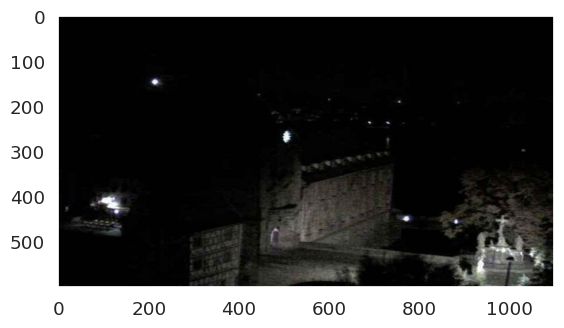

In [632]:
random_img_viz(train_std_img_list)

**Penjelasan:**

Kode tersebut akan memanggil fungsi random_img_viz dengan train_std_img_list sebagai argumen.

Fungsi random_img_viz akan:
* Memilih satu gambar secara acak dari list train_std_img_list.
* Menampilkan gambar tersebut menggunakan Matplotlib.
* Menampilkan informasi tentang gambar tersebut, termasuk dimensi (shape) dan label (0 untuk "night" dan 1 untuk "day").

  * **Ekstraksi Fitur Histogram**

In [633]:
def brightness_histogram(image):
    # Konversi gambar ke grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Hitung histogram grayscale
    hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

    # Nilai rata-rata kecerahan
    avg_brightness = np.mean(gray)

    return hist, avg_brightness

**Penjelasan:**

Kode tersebut mendefinisikan fungsi brightness_histogram untuk menghitung histogram kecerahan dan nilai rata-rata kecerahan dari suatu gambar.
* **def brightness_histogram(image)::** Mendefinisikan fungsi brightness_histogram yang menerima satu argumen, yaitu image.
* **gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY):** Mengubah gambar dari RGB (Red, Green, Blue) ke grayscale menggunakan fungsi cvtColor dari OpenCV.
* **hist = cv2.calcHist([gray], [0], None, [256], [0, 256]):**
  * Menghitung histogram dari gambar grayscale menggunakan fungsi calcHist dari OpenCV.
  * **[gray]:** Gambar grayscale yang akan dihitung histogramnya.
  * **[0]:** Channel yang digunakan (0 untuk grayscale).
  * **None:** Mask (tidak digunakan dalam kasus ini).
  * **[256]:** Jumlah bins dalam histogram (256 untuk rentang nilai piksel 0-255).
  * **[0, 256]:** Rentang nilai piksel.
* **avg_brightness = np.mean(gray):**Menghitung nilai rata-rata dari gambar grayscale menggunakan fungsi mean dari NumPy. Nilai ini merepresentasikan rata-rata kecerahan gambar.
* **return hist, avg_brightness:** Mengembalikan histogram dan nilai rata-rata kecerahan.

  * **Ekstraksi Fitur AVG Kecerahan**

In [634]:
def extract_features(img_list):
    features = []
    labels = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Ekstraksi histogram dan rata-rata kecerahan
        _, avg_brightness = brightness_histogram(image)

        # Simpan nilai rata-rata kecerahan sebagai fitur
        features.append([avg_brightness])
        labels.append(label)

    return np.array(features), np.array(labels)

**Penjelasan:**

Kode tersebut mendefinisikan fungsi extract_features yang digunakan untuk mengekstrak fitur dari list gambar dan label. Fitur yang diekstrak adalah rata-rata kecerahan gambar.
* **def extract_features(img_list)::** Mendefinisikan fungsi extract_features yang menerima satu argumen, yaitu img_list yang berisi tuple (gambar, label).
* **features = []:** Membuat list kosong untuk menyimpan fitur.
* **labels = []:** Membuat list kosong untuk menyimpan label.
* **for item in img_list::** Melakukan iterasi untuk setiap tuple (gambar, label) dalam img_list.
  * **image = item[0]:** Mengambil gambar dari tuple.
  * **label = item[1]:** Mengambil label dari tuple.
  * **_, avg_brightness = brightness_histogram(image):** Memanggil fungsi brightness_histogram untuk mendapatkan histogram dan rata-rata kecerahan gambar.
  * **features.append([avg_brightness]):** Menambahkan rata-rata kecerahan ke list features.
  * **labels.append(label):** Menambahkan label ke list labels.
* **return np.array(features), np.array(labels):** Mengubah list features dan labels menjadi array NumPy dan mengembalikan keduanya.

  * **Ekstraksi Fitur Data Training & Data Test**

In [635]:
train_features, train_labels = extract_features(train_std_img_list)
test_features, test_labels = extract_features(test_std_img_list)

**Penjelasan:**

Kode tersebut memanggil fungsi extract_features untuk mengekstrak fitur dari data training dan testing yang telah dipreprocessing.
* **train_features, train_labels = extract_features(train_std_img_list):**
  * Memanggil fungsi extract_features dengan train_std_img_list (data training yang telah dipreprocessing) sebagai argumen.
  * Fungsi ini akan mengembalikan array NumPy yang berisi fitur dan label.
  * Fitur (rata-rata kecerahan gambar) disimpan dalam variabel train_features.
  * Label disimpan dalam variabel train_labels.
* **test_features, test_labels = extract_features(test_std_img_list):**
  * Memanggil fungsi extract_features dengan test_std_img_list (data testing yang telah dipreprocessing) sebagai argumen.
  * Fitur (rata-rata kecerahan gambar) disimpan dalam variabel test_features.
  * Label disimpan dalam variabel test_labels.

  * **Split Data**

In [636]:
X_train, X_val, y_train, y_val = train_test_split(train_features, train_labels, test_size=0.2, random_state=42)

**Penjelasan:**

Kode tersebut digunakan untuk membagi data (fitur dan label) menjadi data latih (training) dan data uji (testing).
* **X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)**
  * Fungsi train_test_split dari library sklearn.model_selection digunakan untuk membagi data.
  * X dan y adalah fitur dan label yang telah dipisahkan sebelumnya.
  * **test_size=0.2** berarti 20% data akan digunakan sebagai data uji, dan 80% sebagai data latih.
  * **random_state=42** memastikan bahwa pembagian data akan selalu sama setiap kali kode dijalankan, sehingga hasilnya dapat direproduksi.

  * **Cek Data**

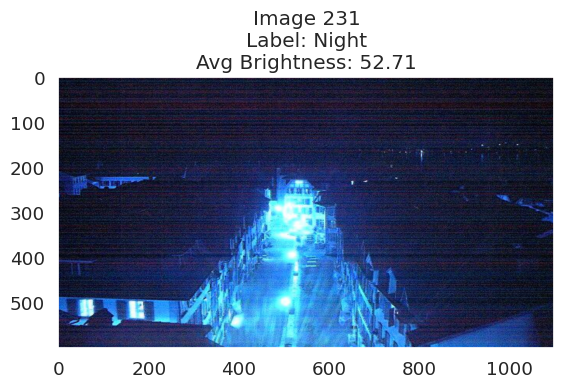

In [637]:
# Pengecekan gambar secara acak
def check_random_brightness(img_list):
    rand_num = np.random.randint(0, len(img_list))
    img = img_list[rand_num][0]
    label = img_list[rand_num][1]

    # Konversi gambar ke RGB jika diperlukan
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    hist, avg_brightness = brightness_histogram(img_rgb)

    # Tampilkan gambar
    plt.grid(False)
    plt.imshow(img_rgb)
    plt.title(f'Image {rand_num + 1}\nLabel: {"Day" if label == 1 else "Night"}\nAvg Brightness: {avg_brightness:.2f}')
    plt.show()

# Pengecekan pada gambar acak
check_random_brightness(train_std_img_list)

**Penjelasan:**

Kode tersebut bertujuan untuk memilih dan menampilkan gambar secara acak dari daftar train_std_img_list, serta menampilkan histogram kecerahan dan rata-rata kecerahan gambar tersebut.
* **def check_random_brightness(img_list)::** Mendefinisikan fungsi check_random_brightness yang menerima satu argumen, yaitu img_list.
* **rand_num = np.random.randint(0, len(img_list)):** Menghasilkan angka acak antara 0 (inklusif) dan panjang img_list (eksklusif). Angka ini akan digunakan sebagai indeks untuk memilih gambar secara acak.
* **img = img_list[rand_num][0]:** Mengambil gambar dari tuple (gambar, label) yang dipilih secara acak dari img_list.
* **label = img_list[rand_num][1]:** Mengambil label dari tuple (gambar, label) yang dipilih secara acak dari img_list.
* **img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB):**
  * OpenCV membaca gambar dalam format BGR (Blue, Green, Red), sedangkan Matplotlib menampilkan gambar dalam format RGB.
  * Kode ini mengonversi gambar dari BGR ke RGB menggunakan fungsi cvtColor dari OpenCV.
* **hist, avg_brightness = brightness_histogram(img_rgb):** Memanggil fungsi brightness_histogram dengan gambar RGB untuk menghitung histogram dan rata-rata kecerahan.
* **plt.grid(False):** Menonaktifkan grid pada plot.
* **plt.imshow(img_rgb):** Menampilkan gambar RGB menggunakan Matplotlib.
* **plt.title(f'Image {rand_num + 1}\nLabel: {"Day" if label == 1 else "Night"}\nAvg Brightness: {avg_brightness:.2f}'):**
  * Menambahkan judul pada plot yang berisi:
    - Nomor gambar (indeks acak + 1)
    - Label gambar ("Day" atau "Night") berdasarkan nilai label
    - Rata-rata kecerahan gambar dengan dua desimal
* **plt.show():** Menampilkan plot.
* **check_random_brightness(train_std_img_list):** Memanggil fungsi check_random_brightness dengan train_std_img_list sebagai argumen untuk menampilkan gambar acak dari data training yang telah dipreprocessing.

  * **Klasifikasi SVM**

In [638]:
# Import the svm module from sklearn
from sklearn import svm

# Membuat model SVM
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

# Prediksi pada data training
train_preds = clf.predict(X_train)

# Prediksi pada data test
test_preds = clf.predict(test_features)

**Penjelasan:**

Kode tersebut membuat dan melatih model SVM (Support Vector Machine) dengan kernel RBF (Radial Basis Function), lalu menggunakan model tersebut untuk melakukan prediksi pada data training dan testing.
* **from sklearn import svm:** Mengimpor modul svm dari scikit-learn yang berisi berbagai implementasi SVM.
* **clf = svm.SVC(kernel='rbf'):**
  * Membuat objek model SVM dengan kernel RBF.
  * Kernel RBF adalah kernel non-linear yang umum digunakan dalam SVM.
* **clf.fit(X_train, y_train):**
  * Melatih model SVM (clf) menggunakan data training (X_train dan y_train).
  * Proses training akan mencari hyperplane optimal yang memisahkan data ke dalam kelas yang berbeda.
* **train_preds = clf.predict(X_train):** Melakukan prediksi pada data training menggunakan model SVM yang telah dilatih dan menyimpan hasilnya dalam variabel train_preds.
* **test_preds = clf.predict(test_features):** Melakukan prediksi pada data testing menggunakan model SVM yang telah dilatih dan menyimpan hasilnya dalam variabel test_preds.

  * **Visualiasi Prediksi**

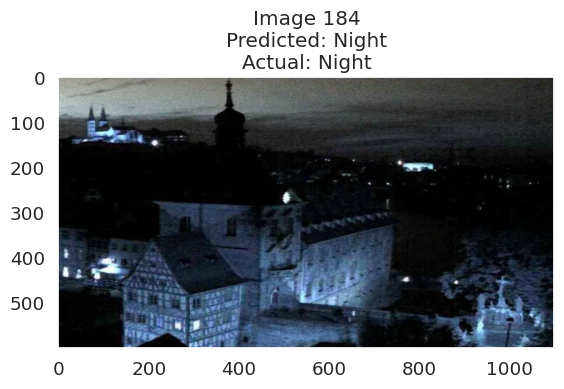

In [639]:
# Fungsi visualisasi prediksi beserta gambar
def visualize_prediction(img_list, X_train, y_train, train_preds):
    rand_idx = np.random.randint(0, len(X_train))  # Pilih gambar acak

    # Ambil gambar asli dari list dan prediksi
    img = img_list[rand_idx][0]
    actual_label = y_train[rand_idx]
    predicted_label = train_preds[rand_idx]

    # Konversi gambar ke RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Tampilkan gambar dengan label asli dan prediksi
    plt.grid(False)
    plt.imshow(img_rgb)
    plt.title(f'Image {rand_idx + 1}\nPredicted: {"Day" if predicted_label == 1 else "Night"}\nActual: {"Day" if actual_label == 1 else "Night"}')
    plt.show()

# Panggil fungsi untuk visualisasi prediksi
visualize_prediction(train_std_img_list, X_train, y_train, train_preds)

**Penjelasan:**

Kode tersebut digunakan untuk memvisualisasikan prediksi dari model machine learning dengan menampilkan gambar acak dari dataset pelatihan beserta label asli dan prediksinya. Fungsi ini dirancang untuk menunjukkan bagaimana model memprediksi kelas dari gambar-gambar yang ada dalam dataset pelatihan.
* **def visualize_prediction(img_list, X_train, y_train, train_preds)::** Mendefinisikan fungsi visualize_prediction yang menerima empat argumen:
  * **img_list:** list gambar dan label.
  * **X_train:** data training.
  * **y_train:** label training.
  * **train_preds:** prediksi model pada data training.
* **rand_idx = np.random.randint(0, len(X_train)):** Memilih indeks acak dari data training.
* **img = img_list[rand_idx][0]:** Mengambil gambar dari img_list berdasarkan indeks acak.
* **actual_label = y_train[rand_idx]:** Mengambil label sebenarnya dari y_train berdasarkan indeks acak.
* **predicted_label = train_preds[rand_idx]:** Mengambil label yang diprediksi oleh model dari train_preds berdasarkan indeks acak.
* **img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB):** Mengonversi gambar dari BGR ke RGB.
* **plt.grid(False):** Menonaktifkan grid pada plot.
* **plt.imshow(img_rgb):** Menampilkan gambar RGB menggunakan Matplotlib.
* **plt.title(f'Image {rand_idx + 1}\nPredicted: {"Day" if predicted_label == 1 else "Night"}\nActual: {"Day" if actual_label == 1 else "Night"}'):** Menambahkan judul pada plot yang berisi:
  * Nomor gambar (indeks acak + 1).
  * Label yang diprediksi oleh model ("Day" atau "Night") berdasarkan predicted_label.
  * Label sebenarnya ("Day" atau "Night") berdasarkan actual_label.
* **plt.show():** Menampilkan plot.
* **visualize_prediction(train_std_img_list, X_train, y_train, train_preds):** Memanggil fungsi visualize_prediction dengan argumen yang dibutuhkan:
  * **train_std_img_list:** list gambar dan label dari data training.
  * **X_train:** data training.
  * **y_train:** label training.
  * **train_preds:** prediksi model pada data training.



  * **Evaluasi**

In [640]:
# Hitung akurasi pada data training
train_acc = accuracy_score(y_train, train_preds)

# Prediksi menggunakan data test
test_preds = clf.predict(test_features)

# Hitung akurasi pada data test
test_acc = accuracy_score(test_labels, test_preds)

# Tampilkan hasil akurasi
print(f'Accuracy on Training Data: {train_acc * 100:.2f}%')
print(f'Accuracy on Test Data: {test_acc * 100:.2f}%')

Accuracy on Training Data: 98.44%
Accuracy on Test Data: 96.25%


**Penjelasan:**

Kode tersebut menghitung dan menampilkan akurasi model SVM pada data training dan data testing.
* **train_acc = accuracy_score(y_train, train_preds):**
  * Menghitung akurasi model pada data training menggunakan fungsi accuracy_score dari scikit-learn.
  * **y_train:** Label sebenarnya dari data training.
  * **train_preds:** Label yang diprediksi oleh model pada data training.
  * Hasilnya disimpan dalam variabel train_acc.
* **test_preds = clf.predict(test_features):** Melakukan prediksi pada data testing menggunakan model SVM yang telah dilatih dan menyimpan hasilnya dalam variabel test_preds.
* **test_acc = accuracy_score(test_labels, test_preds):**
  * Menghitung akurasi model pada data testing.
  * test_labels: Label sebenarnya dari data testing.
  * test_preds: Label yang diprediksi oleh model pada data testing.
  * Hasilnya disimpan dalam variabel test_acc.
* **print(f'Accuracy on Training Data: {train_acc * 100:.2f}%'):** Menampilkan akurasi pada data training dalam persentase dengan dua desimal.
* **print(f'Accuracy on Test Data: {test_acc * 100:.2f}%'):** Menampilkan akurasi pada data testing dalam persentase dengan dua desimal.

Jadi, kode ini mengevaluasi performa model dengan mengukur seberapa akurat model dalam memprediksi label pada data training dan data testing. Perbedaan akurasi antara data training dan testing dapat menunjukkan apakah model mengalami overfitting atau underfitting.